In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

import sklearn

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Read csv from desktop

df = pd.read_csv (r"C:\Users\User\Desktop\kiva_loans.csv")

MPI_region_locations = pd.read_csv(r"D:\Data Science Projects\Kiva Poverty Level Prediction\1. Original\kiva_mpi_region_locations.csv")

loan_themes_by_region_data = pd.read_csv(r"D:\Data Science Projects\Kiva Poverty Level Prediction\1. Original\loan_themes_by_region.csv")

loan_themes_id = pd.read_csv(r"D:\Data Science Projects\Kiva Poverty Level Prediction\1. Original\loan_theme_ids.csv")

loans_data = pd.read_csv(r"D:\Data Science Projects\Kiva Poverty Level Prediction\1. Original\Additional Data\loans.csv")

lenders_data = pd.read_csv(r"D:\Data Science Projects\Kiva Poverty Level Prediction\1. Original\Additional Data\lenders.csv")

country_stats = pd.read_csv(r"D:\Data Science Projects\Kiva Poverty Level Prediction\1. Original\Additional Data\country_stats.csv")

In [12]:
# Print head of data to investigate columns

df.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00              12   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00              11   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00              43   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00              11   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00              14   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [6]:
#Dimensions of the data -- 671,205 loans with 20 features to study

print(df.shape)

(671205, 20)


In [7]:
#Info on the data type (really important for sql conversions). Quick and dirty way to check for missing data too! (look at tags :))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null int64
loan_amount           671205 non-null int64
activity              671205 non-null object
sector                671205 non-null object
use                   666977 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null int64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non-null 

In [8]:
#Describes numerical values for each measure

df.describe()

id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000

In [9]:
#Describe measures and include non-numeric values

df.describe(include=["O"])

activity       sector  \
count    671205       671205   
unique      163           15   
top     Farming  Agriculture   
freq      72955       180302   

                                                      use country_code  \
count                                              666977       671197   
unique                                             424913           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                 5217       160441   

            country  region currency                posted_time  \
count        671205  614405   671205                     671205   
unique           87   12695       67                     667399   
top     Philippines  Kaduna      PHP  2017-05-15 00:00:00+00:00   
freq         160441   10000   160440                         25   

                   disbursed_time                funded_time           tags  \
count                      668809                     622874         499789   
unique                       5719                     498007          86719   
top     2017-02-01 08:00:00+00:00  2016-09-21 13:03:24+00:00  user_favorite   
freq                         2800                         33          27088   

       borrower_genders repayment_interval        date  
count            666984             671205      671205  
unique            11298                  4        1298  
top              female            monthly  03/20/2017  
freq             426502             342717        1308

In [11]:
#Missing data 

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_df_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df_data

Total   Percent
tags                171416  0.255385
region               56800  0.084624
funded_time          48331  0.072006
partner_id           13507  0.020124
use                   4228  0.006299
borrower_genders      4221  0.006289
disbursed_time        2396  0.003570
country_code             8  0.000012
date                     0  0.000000
funded_amount            0  0.000000
loan_amount              0  0.000000
activity                 0  0.000000
sector                   0  0.000000
currency                 0  0.000000
country                  0  0.000000
repayment_interval       0  0.000000
posted_time              0  0.000000
term_in_months           0  0.000000
lender_count             0  0.000000
id                       0  0.000000

In [7]:

print(df['region'].value_counts(dropna=False))

NaN                                      56800
Kaduna                                   10000
Lahore                                    7178
Rawalpindi                                4496
Cusco                                     3841
Dar es Salaam                             3719
Kisii                                     3546
Palo, Leyte                               3320
Narra, Palawan                            3197
Quezon, Palawan                           3120
Kitale                                    3104
Thanh Hoá                                 3086
Medellín                                  3000
San Miguel                                2850
Tacloban City, Leyte                      2843
Brookes Point, Palawan                    2793
Kabankalan, Negros Occidental             2792
San Gabriel                               2773
Eldoret                                   2750
Bais, Negros Oriental                     2665
Cordova, Cebu                             2617
Roxas City, C

In [13]:
#show top 10 missing values from each column


df.isnull().head()

id  funded_amount  loan_amount  activity  sector    use  country_code  \
0  False          False        False     False   False  False         False   
1  False          False        False     False   False  False         False   
2  False          False        False     False   False  False         False   
3  False          False        False     False   False  False         False   
4  False          False        False     False   False  False         False   

   country  region  currency  partner_id  posted_time  disbursed_time  \
0    False   False     False       False        False           False   
1    False   False     False       False        False           False   
2    False   False     False       False        False           False   
3    False   False     False       False        False           False   
4    False   False     False       False        False           False   

   funded_time  term_in_months  lender_count   tags  borrower_genders  \
0        False           False         False   True             False   
1        False           False         False   True             False   
2        False           False         False  False             False   
3        False           False         False   True             False   
4        False           False         False   True             False   

   repayment_interval   date  
0               False  False  
1               False  False  
2               False  False  
3               False  False  
4               False  False

In [5]:
df[df.country_code.isnull()]

id  funded_amount  loan_amount                   activity  \
202537   851360           4150         4150                  Wholesale   
202823   851368           4150         4150                  Wholesale   
344929   991853           3325         3325                  Wholesale   
351177   998555           3325         3325                  Wholesale   
420953  1068167           3325         3325                  Wholesale   
421218  1068159           4000         4000                  Wholesale   
487207  1147852           5100         5100  Renewable Energy Products   
487653  1147866           5000         5000                  Wholesale   

           sector                                                use  \
202537  Wholesale  To purchase lighting products for sale to loca...   
202823  Wholesale  To purchase lighting products for sale to loca...   
344929  Wholesale  To purchase lighting products for sale to loca...   
351177  Wholesale  To purchase lighting products for sale to loca...   
420953  Wholesale  To purchase lighting products for sale to loca...   
421218  Wholesale  purchase solar lighting products for sale to l...   
487207     Retail  to pay for stock of solar lights and cell phon...   
487653  Wholesale  to maintain a stock of solar lights and cell p...   

       country_code  country         region currency  partner_id  \
202537          NaN  Namibia        EEnhana      NAD       437.0   
202823          NaN  Namibia          Rundu      NAD       437.0   
344929          NaN  Namibia        EEnhana      NAD       437.0   
351177          NaN  Namibia          Rundu      NAD       437.0   
420953          NaN  Namibia        EEnhana      NAD       437.0   
421218          NaN  Namibia          Rundu      NAD       437.0   
487207          NaN  Namibia  Katima Mulilo      NAD       437.0   
487653          NaN  Namibia       Oshakati      NAD       437.0   

                      posted_time             disbursed_time  \
202537  2015-03-05 20:23:50+00:00  2015-06-03 07:00:00+00:00   
202823  2015-03-05 20:56:01+00:00  2015-06-03 07:00:00+00:00   
344929  2015-12-08 19:08:18+00:00  2016-01-05 08:00:00+00:00   
351177  2015-12-21 19:59:37+00:00  2016-01-05 08:00:00+00:00   
420953  2016-05-12 21:33:33+00:00  2016-06-10 07:00:00+00:00   
421218  2016-05-12 21:19:41+00:00  2016-06-10 07:00:00+00:00   
487207  2016-09-08 22:12:16+00:00  2016-10-01 07:00:00+00:00   
487653  2016-09-08 22:30:43+00:00  2016-10-01 07:00:00+00:00   

                      funded_time  term_in_months  lender_count  \
202537  2015-03-25 15:10:03+00:00               6           162   
202823  2015-03-25 15:48:31+00:00               6           159   
344929  2015-12-22 03:53:32+00:00               7           120   
351177  2015-12-22 05:58:09+00:00               7           126   
420953  2016-05-15 20:27:57+00:00               7           118   
421218  2016-05-15 17:36:49+00:00               7           150   
487207  2016-10-03 21:56:37+00:00               7           183   
487653  2016-09-19 06:32:16+00:00               7           183   

                                                     tags borrower_genders  \
202537                       user_favorite, user_favorite           female   
202823                                      user_favorite             male   
344929                                      user_favorite           female   
351177                                                NaN             male   
420953  #Repeat Borrower, user_favorite, user_favorite...           female   
421218  #Eco-friendly, #Repeat Borrower, #Technology, ...             male   
487207  #Eco-friendly, #Technology, user_favorite, use...             male   
487653  #Eco-friendly, #Technology, user_favorite, use...           female   

       repayment_interval        date  
202537             bullet  2015-03-05  
202823             bullet  2015-03-05  
344929             bullet  2015-12-08  
351177             bullet  2015-12-21  


In [14]:
#all the columns where region is missing -- easy data cleaning process

df[df.region.isnull()]

id  funded_amount  loan_amount                   activity  \
5       1080148            250          250                   Services   
49       653418            450          450              General Store   
54       653380            225          225                Food Market   
67      1080150            125          125                     Energy   
70       653244           2000         2000                     Retail   
99      1080153           5000         5000      Food Production/Sales   
102      653399           3975         3975                 Food Stall   
111      653376            225          225                     Retail   
112      653256           1925         2400         Electronics Repair   
114     1080151            125          125                     Energy   
135      653384            850          850                 Blacksmith   
140      653375           2975         2975      Food Production/Sales   
145      653427           1200         1200          Personal Expenses   
157      653408           3400         3400             Clothing Sales   
165      653403           2850         2850                    Poultry   
170      653177           4250         4250                   Catering   
186      653253           2625         3000              Grocery Store   
195     1080149            125          125              Grocery Store   
200      653236           2000         2000              Grocery Store   
202      653360            500          500              General Store   
205      653389            125          125                    Poultry   
215      653374            500          500  Personal Housing Expenses   
222      653232           2400         2400              Grocery Store   
231     1080154          10000        10000      Food Production/Sales   
232      653226           3000         3000              Mobile Phones   
233      653221           3000         3000              Grocery Store   
240      653422           1025         1025                     Retail   
255      653425            300          300        Fruits & Vegetables   
273      653412            375          375             Clothing Sales   
277      653361            500          500                 Metal Shop   
...         ...            ...          ...                        ...   
670901  1337697              0          875              Internet Cafe   
670903  1337686              0          175                Agriculture   
670905  1337514           1675         2000               Animal Sales   
670907  1337766            325          325                  Tailoring   
670909  1337722            525          900                Barber Shop   
670914  1337780           1000         7000                       Arts   
670915  1337785            500         2000                 Restaurant   
670917  1337769            500          500      Food Production/Sales   
671122  1339259              0         1000              Internet Cafe   
671151  1340245              0           25                  Livestock   
671160  1340250              0           25                  Livestock   
671166  1340251             25           25                  Livestock   
671167  1340262              0           25                  Livestock   
671168  1340260              0           25                  Livestock   
671169  1340273              0           25                  Livestock   
671171  1340264              0           25                      Games   
671172  1340271              0           25                  Livestock   
671174  1340275              0           25                      Games   
671177  1340279             25           25                  Livestock   
671178  1340280              0           25                  Livestock   
671185  1340298              0           25                  Livestock   
671187  1340297              0           25                  Livestock   
671189  1340315  

In [15]:
#all the columns where gender is missing 

df[df.borrower_genders.isnull()]

id  funded_amount  loan_amount                        activity  \
140      653375           2975         2975           Food Production/Sales   
145      653427           1200         1200               Personal Expenses   
170      653177           4250         4250                        Catering   
412      653513           2350         2350                    Beauty Salon   
414      653775            725          725                     Agriculture   
464      653479           1000         1000                          Sewing   
466      653757           1075         1075       Personal Housing Expenses   
546      653806           5450         5450                          Retail   
595      653486            325          325                  Clothing Sales   
616      653473            700          700           Food Production/Sales   
634      653484            375          375                          Retail   
695      653447           5000         5000                        Services   
797      653823            275          275                         Farming   
909      653974           2600         2600                           Dairy   
1080     654102           1500         1500                        Services   
1110     654380            850          850         Personal Products Sales   
1206     654010            775          775             Fruits & Vegetables   
1209     654284           1600         1600                          Crafts   
1223     654285            300          300           Food Production/Sales   
1337     654433           1000         1000                        Services   
1345     654799           1050         1050           Food Production/Sales   
1449     654406            450          450                      Food Stall   
1510     654820            500          500                            Pigs   
1515     654405           1500         1500                   General Store   
1596     654809            500          500                   General Store   
1618     654806            500          500                  Clothing Sales   
1675     654592           3025         3025                            Food   
1706     654876           5000         5000                        Services   
1711     654500           3000         3000                            Cafe   
1829     655247            300          300                           Dairy   
...         ...            ...          ...                             ...   
629112  1291534            250          250                  Clothing Sales   
629462  1291628            500          500                         Cereals   
629647  1291114            400          400                         Cereals   
632131  1294241            350          350                         Farming   
632466  1295103            600        10000           Food Production/Sales   
633352  1295815            150          425                   General Store   
633506  1295826              0         3000               Cleaning Services   
635237  1297628              0          700                       Livestock   
635806  1297973           1575         1575                         Farming   
636208  1298778            325          550                         Farming   
639085  1300886              0          850                          Cattle   
640245  1302542              0          700                   General Store   
642696  1305900            975         1575                   Grocery Store   
643472  1305665              0          425                         Farming   
646452  1309366              0         3000                        Clothing   
646748  1309344            175          275                         Farming   
647086  1309876            200          200                         Farming   
647114  1310385              0         5000              Education provider   
647505  1310408             50          350                    

In [16]:
# dropping all columns without region and borrower genders

df.dropna(subset=['region', 'borrower_genders'], how ='any').shape

(614405, 20)

In [17]:
df[df.funded_time.isnull()]

id  funded_amount  loan_amount                    activity  \
87       653261           4275         5000   Personal Housing Expenses   
112      653256           1925         2400          Electronics Repair   
186      653253           2625         3000               Grocery Store   
309      653259           2750         3000               Grocery Store   
313      653263           1300         3000                    Clothing   
648      653653            700         2100               Grocery Store   
747      653872            750         1000               General Store   
752      653869            475         1200               General Store   
796      653876            450         1000                        Food   
811      653863            450          800   Personal Housing Expenses   
815      653884            525         1500               General Store   
820      653916            475         1050                         Pub   
836      653912            500         1050                   Beverages   
840      653917            650         1050                  Food Stall   
872      654189            525          925               General Store   
1012     654153            975         1475            Wedding Expenses   
1039     654048           1900         2350             Cosmetics Sales   
1077     654180            525         1400               General Store   
1138     654122           1025         1400             Cosmetics Sales   
1157     653957           1725         2600                 Agriculture   
1166     654181            650         1400              Clothing Sales   
1179     654220           1100         2800                   Beverages   
1217     654104            550         1050            Wedding Expenses   
1227     654043           1100         1175               Grocery Store   
1232     654005            825         1550                 Agriculture   
1250     654186            675         1400  Liquor Store / Off-License   
1340     654478            750          925        Motorcycle Transport   
1341     654582           3300         5525              Clothing Sales   
1396     654721            550          925        Motorcycle Transport   
1411     654630            875         1500            Wedding Expenses   
...         ...            ...          ...                         ...   
671172  1340271              0           25                   Livestock   
671173  1340263             75          125                   Livestock   
671174  1340275              0           25                       Games   
671175  1340274             75          125                   Livestock   
671176  1340259              0           50                   Livestock   
671178  1340280              0           25                   Livestock   
671179  1340282              0           25                   Livestock   
671180  1340286              0          725                   Livestock   
671181  1340285              0           25                   Livestock   
671182  1340292              0          125                   Livestock   
671183  1340290              0           75                   Livestock   
671184  1340287              0          875                   Livestock   
671185  1340298              0           25                   Livestock   
671187  1340297              0           25                   Livestock   
671188  1340302              0          250                   Livestock   
671189  1340315              0           25                   Livestock   
671190  1340321              0           25                   Livestock   
671191  1340327              0          725                   Livestock   
671192  1340328              0          875                   Livestock   
671193  1340333              0          125                   Livestock   
671194  1340332              0           25                   Livestock   
671195  1340329              0        

In [18]:
#count the number of missing values in each column

df.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4228
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [88]:
plt.figure(figsize=(15,8))
sector_name = df['sector'].value_counts()

sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k', fontsize=19)
    plt.xticks(rotation='vertical')
    plt.xlabel('Number of Loans Given')
    plt.ylabel('Sector Name')
    plt.title("Top Sectors by Loans Given")
    plt.grid(True)

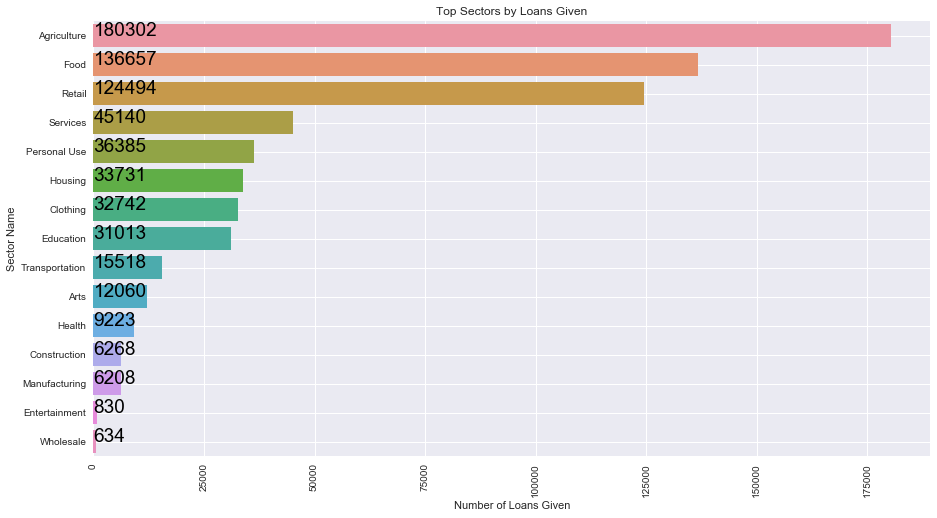

In [89]:
plt.show()

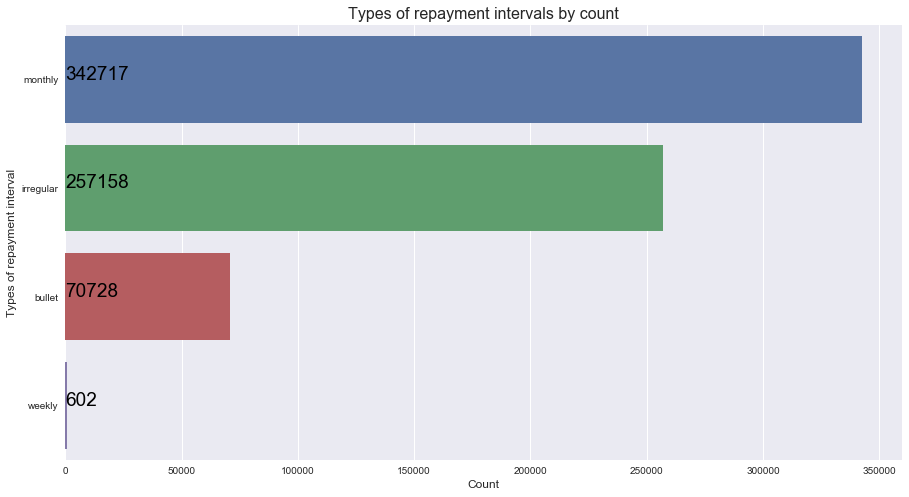

In [21]:
# Repayment intervals by count - how many are repaying monthly, irregularly or bullet?
plt.show()

In [22]:
plt.figure(figsize=(15,8))
count = df['country'].value_counts().head()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v, color='k', fontsize=19)
plt.xlabel('Count', fontsize=19)
plt.ylabel('Country name', fontsize=12)
plt.title("Most frequent countries for Kiva Loans", fontsize=16)

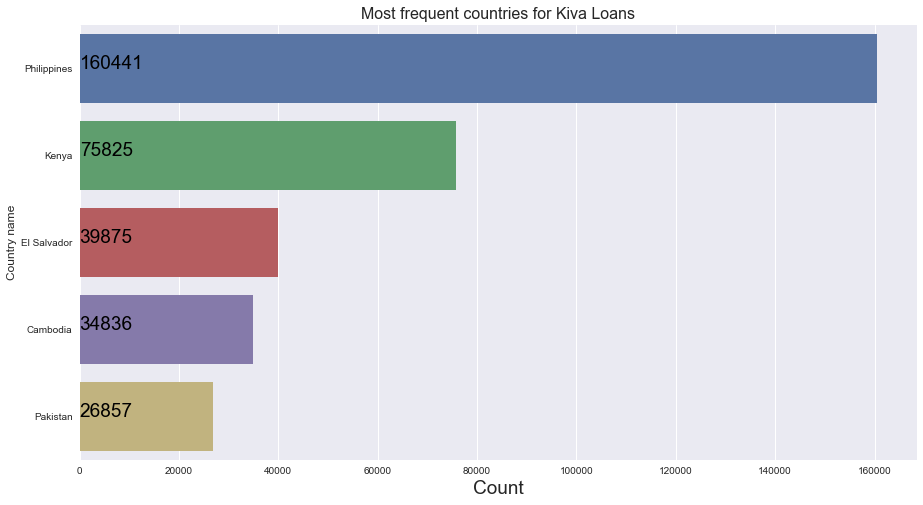

In [23]:
plt.show()

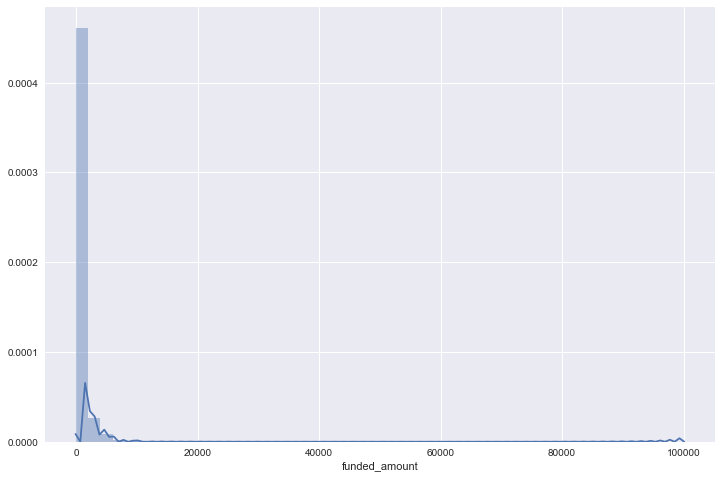

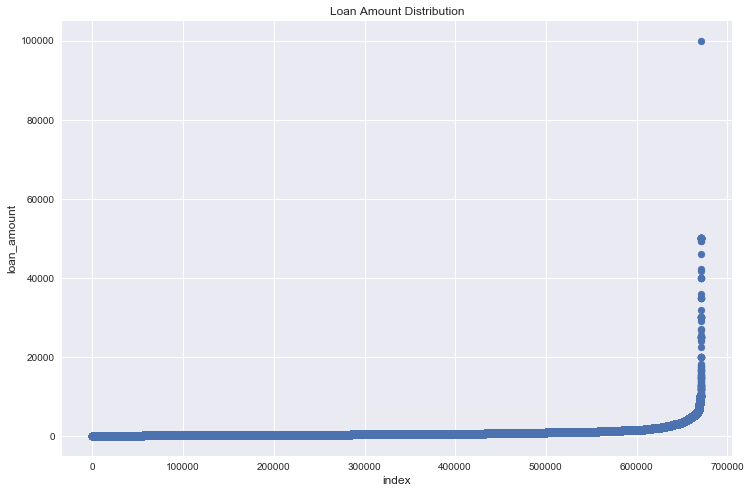

In [24]:
#Distribution of funded amount 

plt.figure(figsize = (12,8))

sns.distplot(df['funded_amount'])
plt.show()

plt.figure(figsize = (12,8))
plt.scatter(range(df.shape[0]), np.sort(df.funded_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()


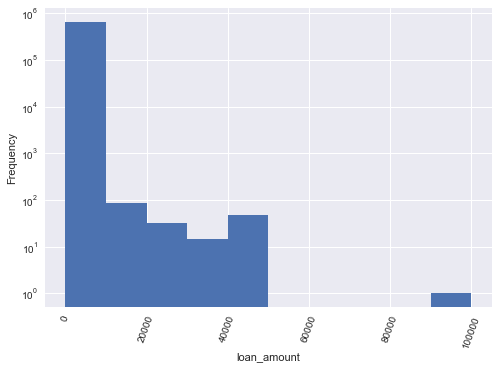

In [25]:
df['loan_amount'].plot(kind = 'hist', rot=70, logx=False, logy=True)
plt.xlabel('loan_amount')
plt.show()

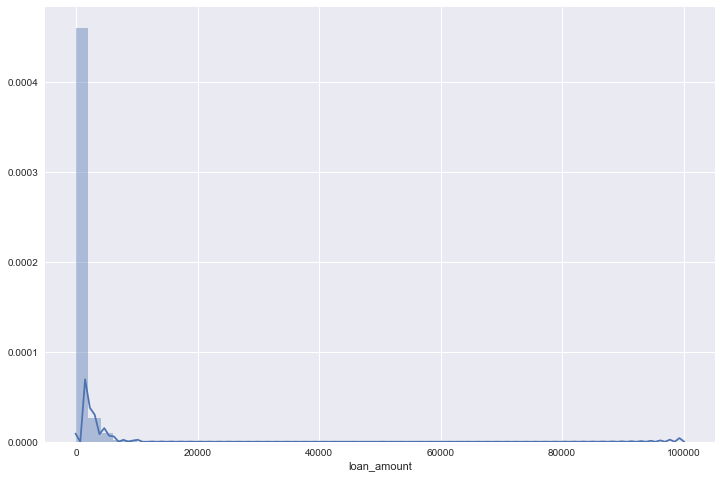

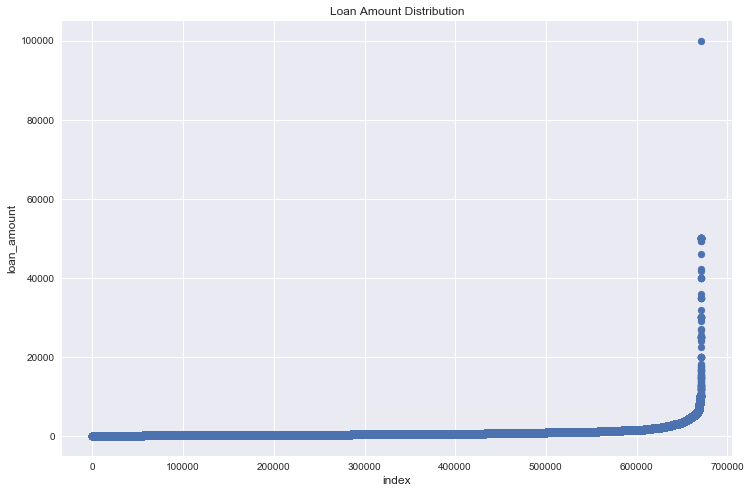

In [26]:
#Distribution of loan amount

plt.figure(figsize = (12,8))

sns.distplot(df['loan_amount'])
plt.show()
plt.figure(figsize = (12,8))


plt.scatter(range(df.shape[0]), np.sort(df.funded_amount))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

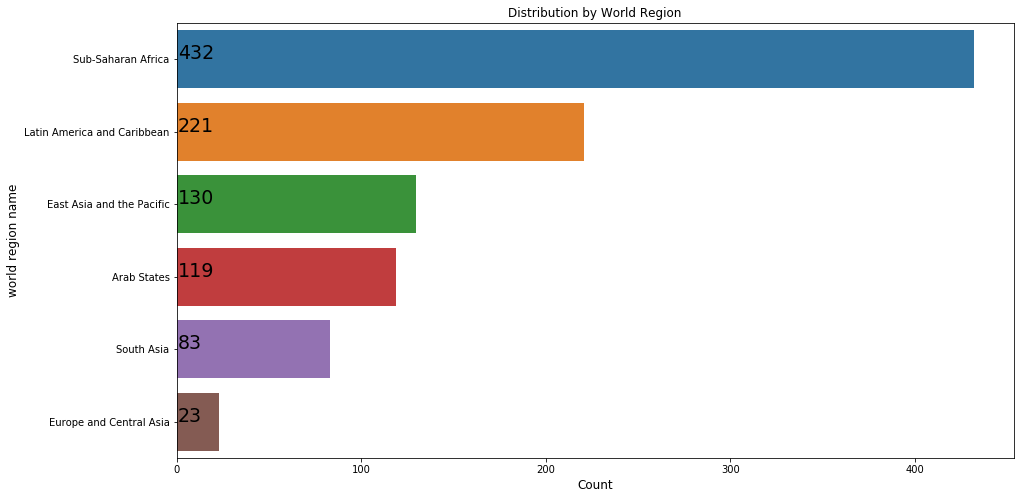

In [5]:
#Distribution by Region

plt.figure(figsize=(15,8))
count = MPI_region_locations['world_region'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8, i, v, color='k', fontsize = 19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('world region name', fontsize = 12)
plt.title('Distribution by World Region')
plt.show()

Number of lenders per loan :  503
8     34204
7     32497
9     32476
1     31995
5     30439
6     29407
10    28171
11    25897
12    25291
4     24616
Name: lender_count, dtype: int64


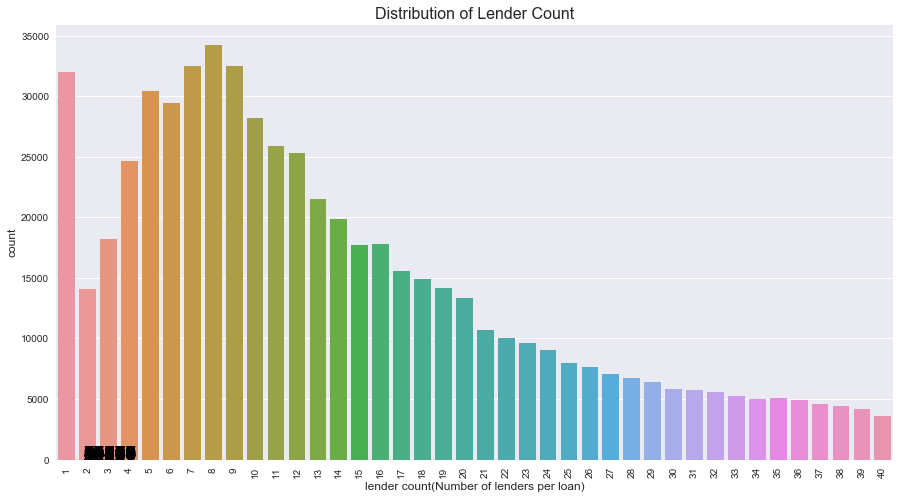

In [44]:
#number of lenders contributing to a loan distribution

print("Number of lenders per loan : ", len(df["lender_count"].unique()))
print(df["lender_count"].value_counts().head(10))
lender = df['lender_count'].value_counts().head(40)
plt.figure(figsize=(15,8))

sns.barplot(lender.index, lender.values, )
for i, v in enumerate (lender.values):
    plt.text(0.8, i,v, color='k', fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('lender count(Number of lenders per loan)', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of Lender Count", fontsize=16)
plt.show()

In [45]:
#Distribution of loan activity type 

plt.figure(figsize=(15,8))
count = df['activity'].value_counts().head(30)
sns.barplot(count.values, count.index)
for i, v in enumerate (count.values):
    plt.text(0.8, i, v, color='k', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Activity Name', fontsize=12)
plt.title("Top Loan Activity type", fontsize=16)

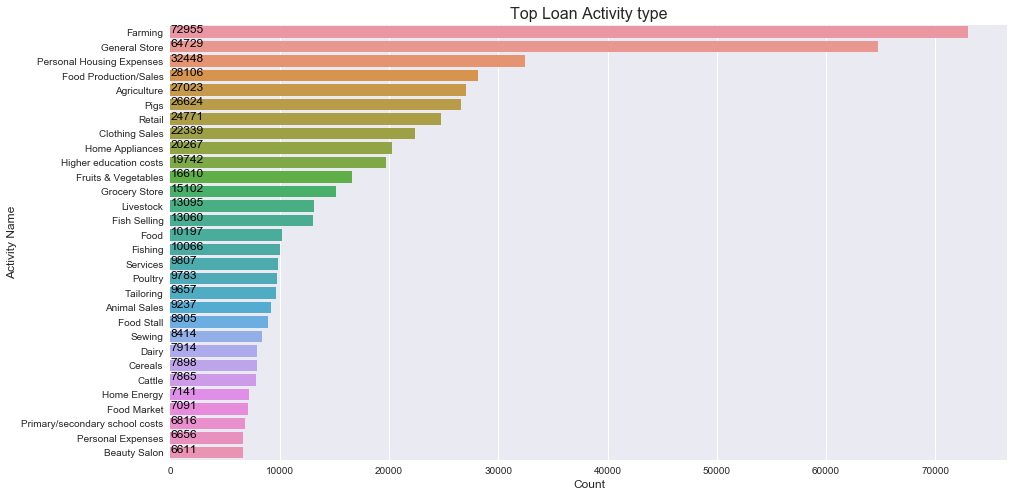

In [46]:
plt.show()

Number of months over which loan was scheduled to be paid back :  148
14    166750
8     143042
11     40694
7      32847
13     30501
20     28483
6      26039
12     25700
15     25255
26     23431
Name: term_in_months, dtype: int64


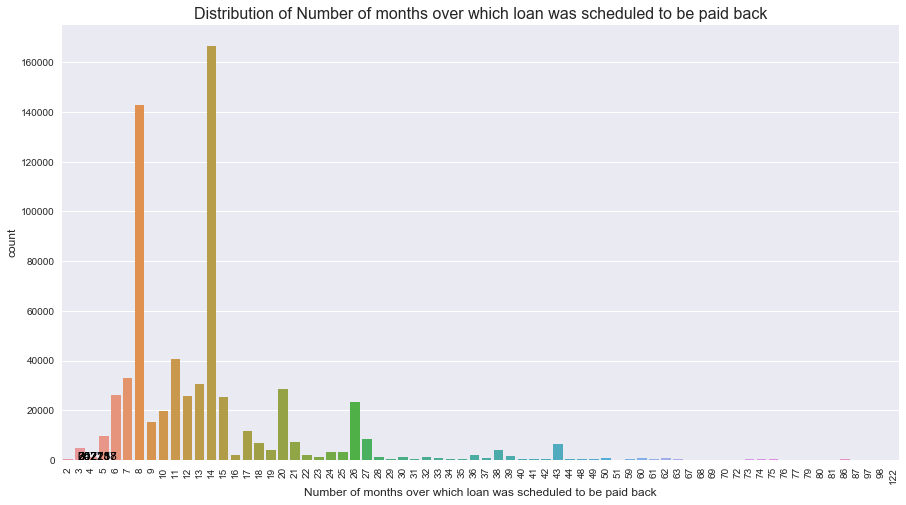

In [75]:
#Repayment Interval

print("Number of months over which loan was scheduled to be paid back : ", len(df["term_in_months"].unique()))
print(df["term_in_months"].value_counts().head(10))
lender = df['term_in_months'].value_counts().head(70)
plt.figure(figsize=(15,8))

sns.barplot(lender.index, lender.values, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Number of months over which loan was scheduled to be paid back', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of Number of months over which loan was scheduled to be paid back", fontsize=16)
plt.show()

In [85]:
plt.figure(figsize=(15,8))
count = df['use'].value_counts().head()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k', fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('uses of loans', fontsize=12)
plt.title("Most popular uses of loans", fontsize=16)

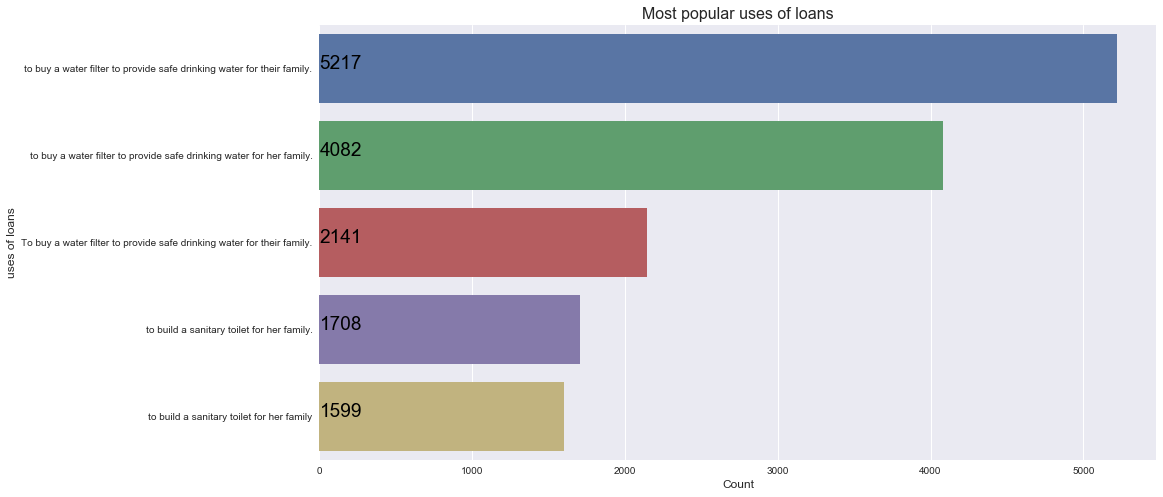

In [86]:
plt.show()

In [6]:
plt.figure(figsize=(15,8))
count = df['sector'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k', fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Distribution of Sectors', fontsize=12)
plt.title('Distribution of Activities', fontsize=16)

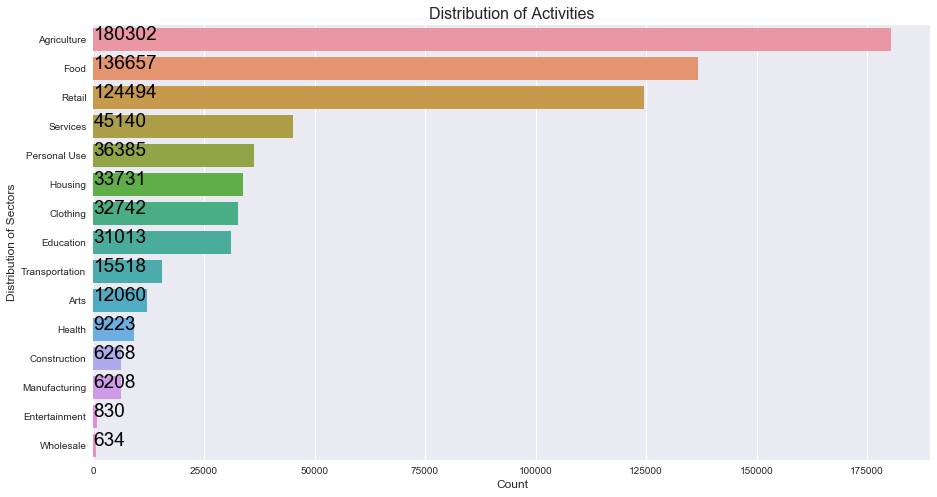

In [7]:
plt.show()

In [10]:
#Distribution of Repayment Intervals
plt.figure(figsize=(15,8))
count = df['repayment_interval'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k', fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Repayment Intervals', fontsize=12)
plt.title('Distribution of Repayment Intervals', fontsize=16)

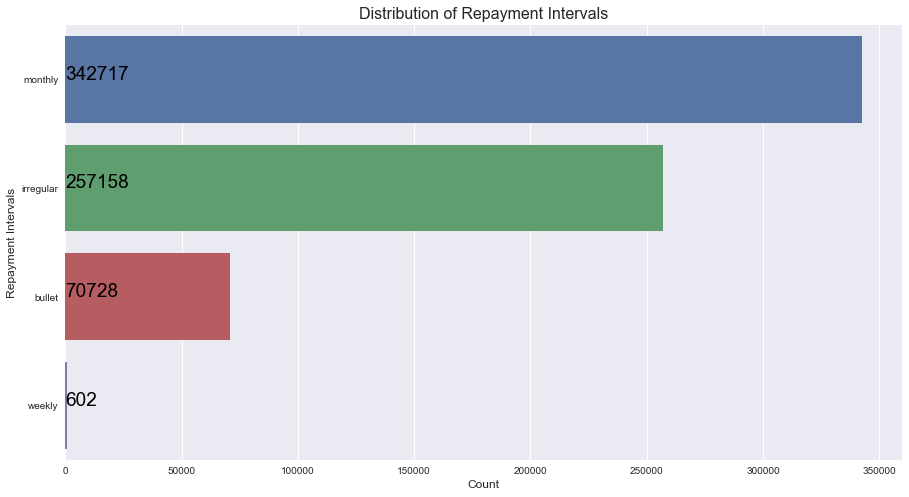

In [11]:
plt.show()

In [3]:
#Gender distribution 

gender_list = []
for gender in df["borrower_genders"].values:
    if str(gender) != "nan":
        gender_list.extend( [lst.strip() for lst in gender.split(",")] )
temp_data = pd.Series(gender_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Borrower Gender')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

<Figure size 1080x576 with 0 Axes>

  sex_borrowers  funded_amount
0          male     864.169009
1        female     761.531200


Text(0,0.5,'Average funded Amount(US)')

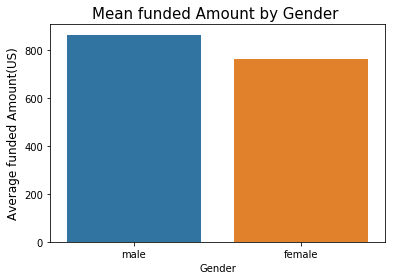

In [7]:
df.borrower_genders = df.borrower_genders.astype(str)
gender_data = pd.DataFrame(df.borrower_genders.str.split(',').tolist())
df['sex_borrowers'] = gender_data[0]
df.loc[df.sex_borrowers == 'nan', 'sex_borrowers'] = np.nan
sex_mean = pd.DataFrame(df.groupby(['sex_borrowers'])['funded_amount'].mean().sort_values(ascending=False)).reset_index()
print(sex_mean)
g1 = sns.barplot(x='sex_borrowers', y='funded_amount', data=sex_mean)
g1.set_title("Mean funded Amount by Gender ", fontsize=15)
g1.set_xlabel("Gender")
g1.set_ylabel("Average funded Amount(US)", fontsize=12)

Genders count with repayment interval monthly
 female    244088
male       96083
Name: sex_borrowers, dtype: int64
Genders count with repayment interval weekly
 female    571
male       31
Name: sex_borrowers, dtype: int64
Genders count with repayment interval bullet
 male      35580
female    34058
Name: sex_borrowers, dtype: int64
Genders count with repayment interval irregular
 female    234926
male       21647
Name: sex_borrowers, dtype: int64


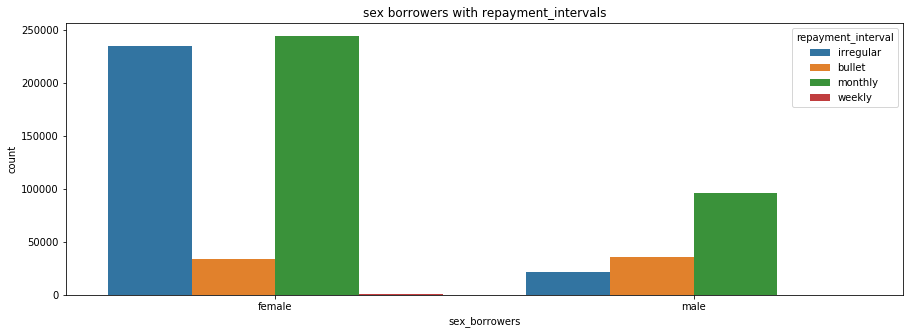

In [10]:
f, ax = plt.subplots(figsize=(15, 5))
print("Genders count with repayment interval monthly\n",df['sex_borrowers'][df['repayment_interval'] == 'monthly'].value_counts())
print("Genders count with repayment interval weekly\n",df['sex_borrowers'][df['repayment_interval'] == 'weekly'].value_counts())
print("Genders count with repayment interval bullet\n",df['sex_borrowers'][df['repayment_interval'] == 'bullet'].value_counts())
print("Genders count with repayment interval irregular\n",df['sex_borrowers'][df['repayment_interval'] == 'irregular'].value_counts())

sns.countplot(x="sex_borrowers", hue='repayment_interval', data=df).set_title('sex borrowers with repayment_intervals');

Top Kiva Field Partner Names with funding count :  302
Alalay sa Kaunlaran (ASKI)                           1207
SEF International                                     992
Gata Daku Multi-purpose Cooperative (GDMPC)           952
Paglaum Multi-Purpose Cooperative (PMPC)              673
Interactuar                                           671
Thanh Hoa Microfinance Institution                    666
South Pacific Business Development (SPBD) - Samoa     398
Bai Tushum Bank                                       393
African Clean Energy (ACE)                            336
VisionFund Cambodia                                   324
Name: Field Partner Name, dtype: int64


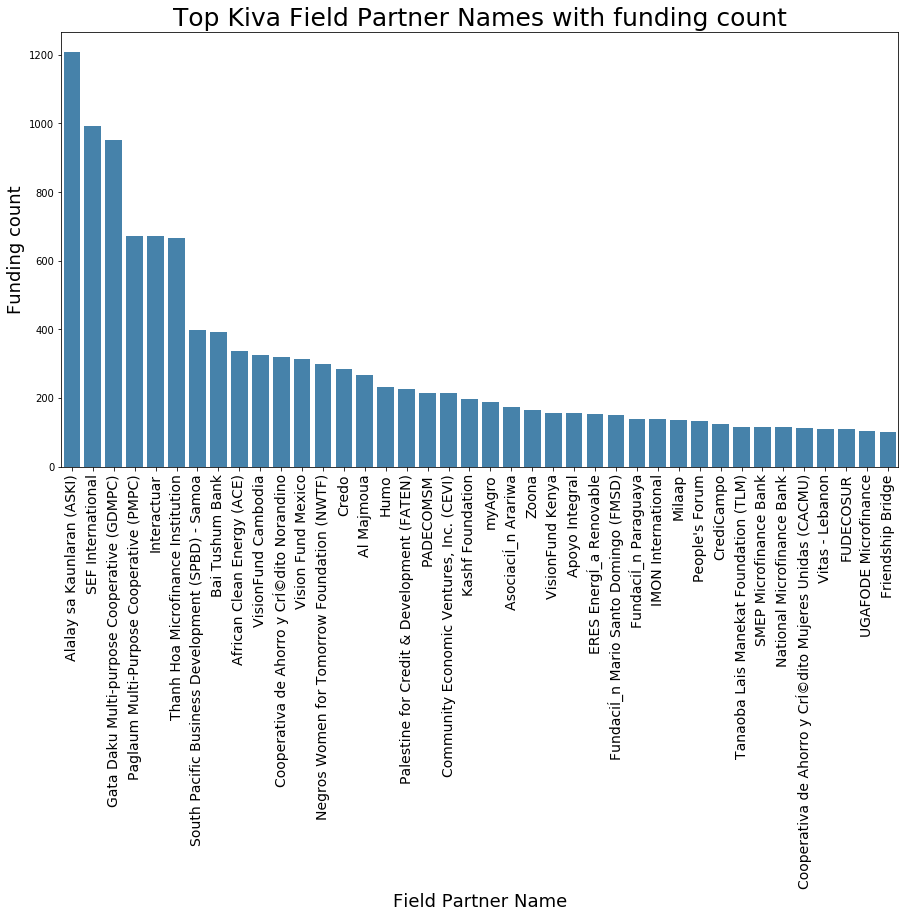

In [19]:
#Field partners distribute loans for kiva, this shows the top ones and funding counts

print("Top Kiva Field Partner Names with funding count : ", len(loan_themes_by_region_data["Field Partner Name"].unique()))
print(loan_themes_by_region_data["Field Partner Name"].value_counts().head(10))
lender = loan_themes_by_region_data['Field Partner Name'].value_counts().head(40)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Field Partner Name', fontsize=18)
plt.ylabel('Funding count', fontsize=18)
plt.title("Top Kiva Field Partner Names with funding count", fontsize=25)
plt.show()

Text(0.5,1,'Popular loan sector in terms of loan amount')

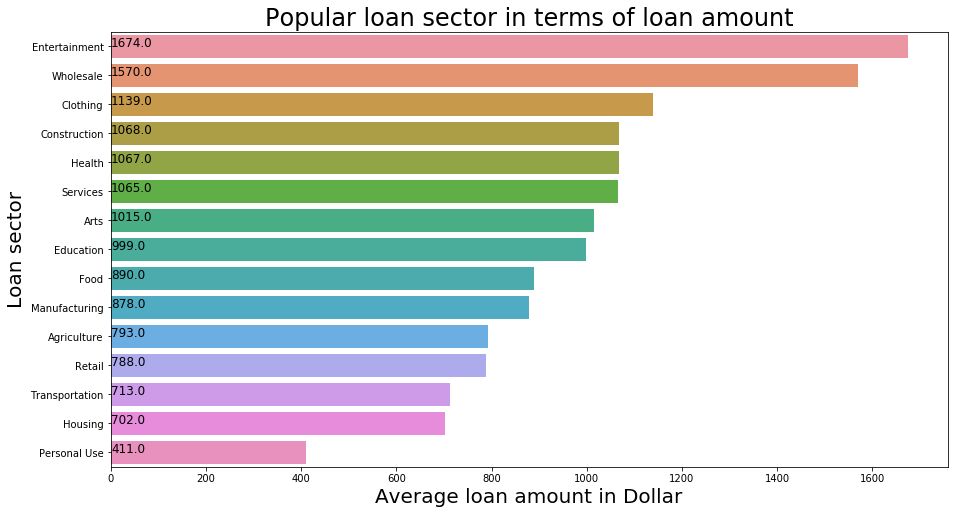

In [21]:
#Loans by sector by amount


plt.figure(figsize=(15,8))
count = round(df.groupby(['sector'])['loan_amount'].mean().sort_values(ascending=False))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan sector in terms of loan amount', fontsize=24)

Text(0.5,1,'Popular loan activity in terms of loan amount')

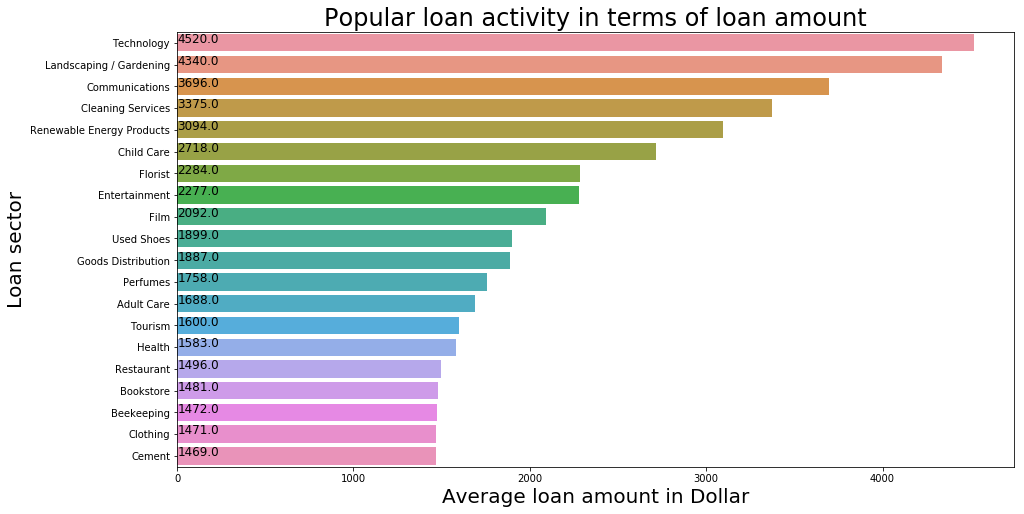

In [22]:
#Popular activity by amount 

plt.figure(figsize=(15,8))
count = round(df.groupby(['activity'])['loan_amount'].mean().sort_values(ascending=False).head(20))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan activity in terms of loan amount', fontsize=24)

Text(0.5,1,'Popular regions in terms of loan amount')

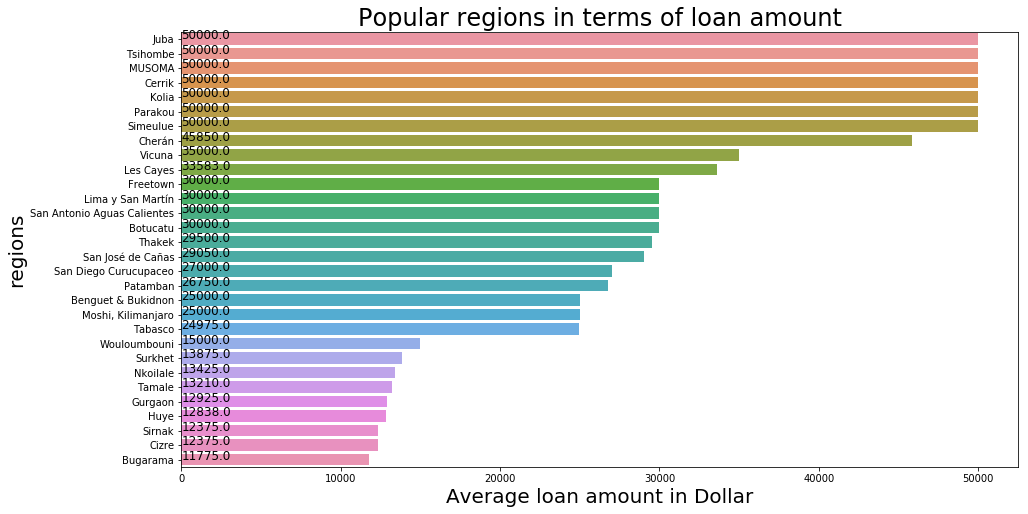

In [4]:
#Top regions in terms of loan amounts

plt.figure(figsize=(15,8))
count = round(df.groupby(['region'])['loan_amount'].mean().sort_values(ascending=False).head(30))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('regions', fontsize=20)
plt.title('Popular regions in terms of loan amount', fontsize=24)

In [26]:
countries_funded_amount = df.groupby('country').mean()['funded_amount'].sort_values(ascending = False)
print("Top Countries with funded_amount\n",countries_funded_amount.head(10))

Top Countries with funded_amount
 country
Cote D'Ivoire         50000.000000
Mauritania            15000.000000
Bhutan                 7812.500000
Chile                  7625.000000
Afghanistan            7000.000000
Congo                  6142.578125
Puerto Rico            4409.191176
Dominican Republic     4200.604839
Namibia                4046.875000
United States          3800.843591
Name: funded_amount, dtype: float64


In [30]:
data = [dict(
        type='choropleth',
        locations= countries_funded_amount.index,
        locationmode='country names',
        z=countries_funded_amount.values,
        text=countries_funded_amount.index,
        colorscale='Green',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top Countries with funded_amount(Mean value)'),
)]
layout = dict(title = 'Top Countries with funded_amount',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

In [31]:
mpi_region_amount = round(loan_themes_by_region_data.groupby('mpi_region').mean()['amount'].sort_values(ascending = False))
print("Top mpi_region by Funding amount\n",mpi_region_amount.head(10))

Top mpi_region by Funding amount
 mpi_region
Itasy, Madagascar                                 632550.0
Kaduna, Nigeria                                   527808.0
Harare, Zimbabwe                                  292383.0
Hauts basins, Burkina Faso                        287750.0
Luangprabang, Lao People's Democratic Republic    266200.0
Sud-Kivu, Congo, Democratic Republic of the       206406.0
Del Yuma, Dominican Republic                      191212.0
SEN                                               177896.0
Retalhuleu, Guatemala                             175425.0
RWA                                               172175.0
Name: amount, dtype: float64


In [32]:
data = [dict(
        type='choropleth',
        locations= mpi_region_amount.index,
        locationmode='country names',
        z=mpi_region_amount.values,
        text=mpi_region_amount.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top mpi_regions with amount(Mean value)'),
)]
layout = dict(title = 'Top mpi_regions by Funding Amount',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

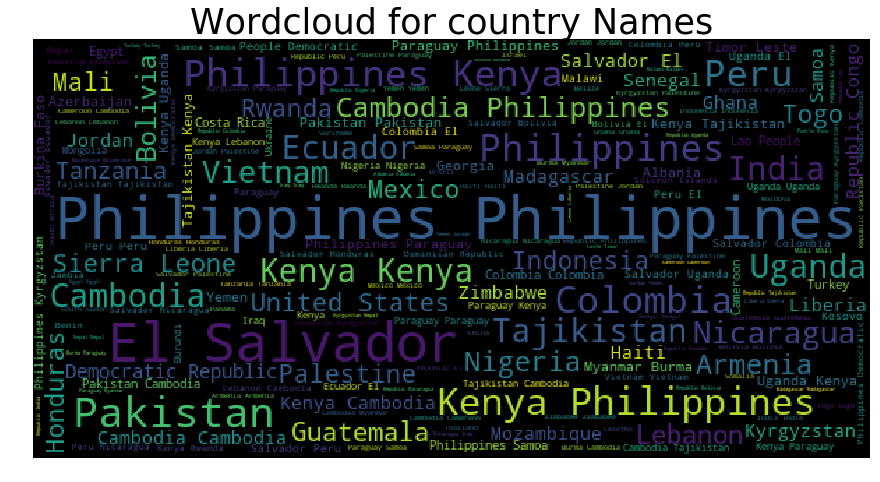

In [47]:
#clearly the word phillippines is misspelled throughout :)
from wordcloud import WordCloud

names = df["country"][~pd.isnull(df["country"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for country Names", fontsize=35)
plt.axis("off")
plt.show() 

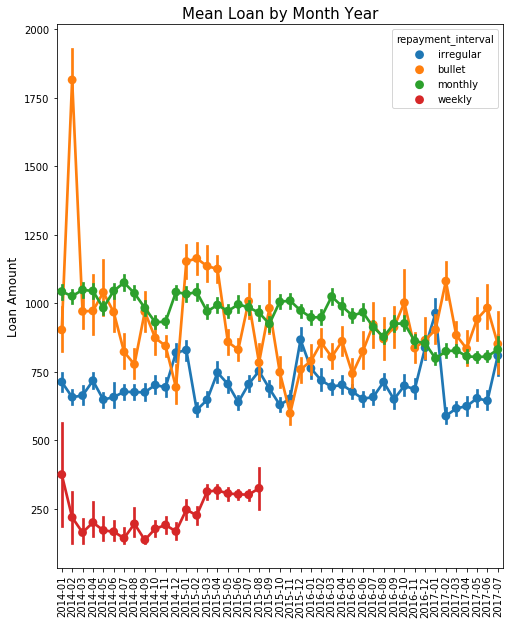

In [48]:
df['date'] = pd.to_datetime(df['date'])
df['date_month_year'] = df['date'].dt.to_period("M")
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='date_month_year', y='loan_amount', 
                   data=df, hue='repayment_interval')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Mean Loan by Month Year", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Loan Amount", fontsize=12)
plt.show()

id  funded_amount  loan_amount  partner_id  \
id              1.000000      -0.049578    -0.027488    0.154787   
funded_amount  -0.049578       1.000000     0.945044   -0.075276   
loan_amount    -0.027488       0.945044     1.000000   -0.071251   
partner_id      0.154787      -0.075276    -0.071251    1.000000   
term_in_months -0.055832       0.149310     0.184795    0.094878   
lender_count   -0.095418       0.849168     0.798697   -0.008575   

                term_in_months  lender_count  
id                   -0.055832     -0.095418  
funded_amount         0.149310      0.849168  
loan_amount           0.184795      0.798697  
partner_id            0.094878     -0.008575  
term_in_months        1.000000      0.227283  
lender_count          0.227283      1.000000

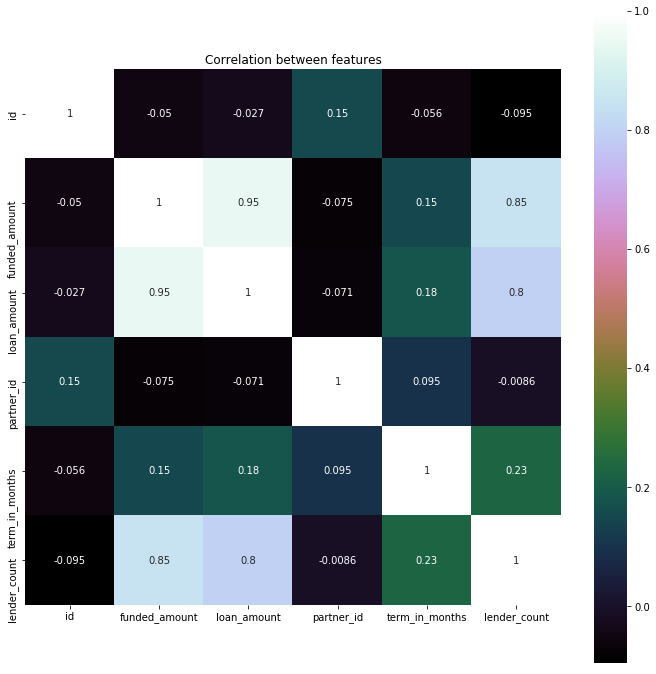

In [51]:
#Correlation Matrix - values more then 0.05 should be investigated
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between features')
corr

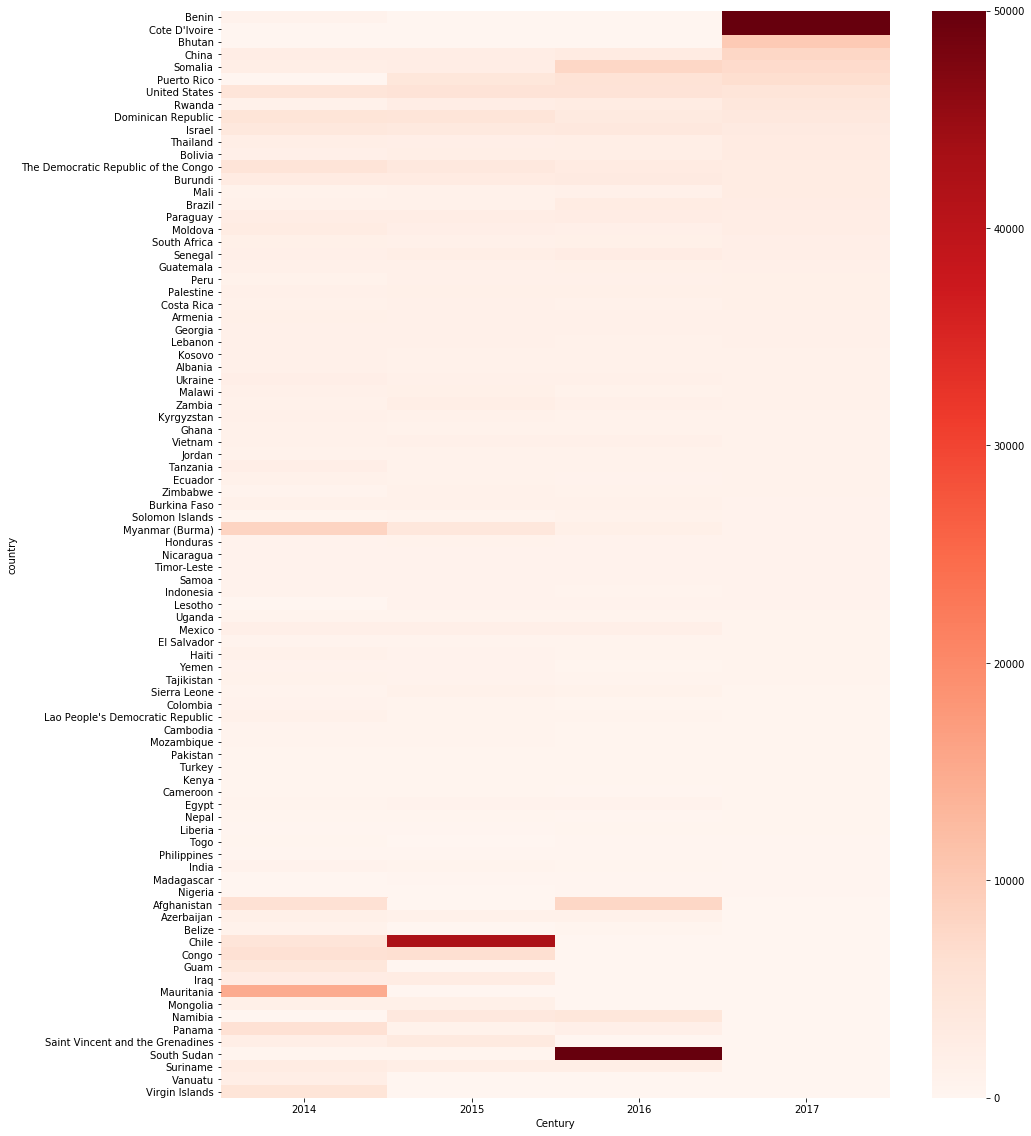

In [52]:
#Heatmap of year by year distribution of loans - each year a certain country got more loans

df['Century'] = df.date.dt.year
loan = df.groupby(['country', 'Years'])['loan_amount'].mean().unstack()
loan = loan.sort_values([2017], ascending=False)
f, ax = plt.subplots(figsize=(15, 20)) 
loan = loan.fillna(0)
temp = sns.heatmap(loan, cmap='Reds')
plt.show()

In [54]:
#repayment loans by interval for each country

sector_repayment = ['country', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[sector_repayment[0]], df[sector_repayment[1]]).style.background_gradient(cmap = cm)

In [56]:
sector_repayment = ['sector', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[sector_repayment[0]], df[sector_repayment[1]]).style.background_gradient(cmap = cm)

[Text(0,0.5,'Frequency'), Text(0.5,0,'Terms in months')]

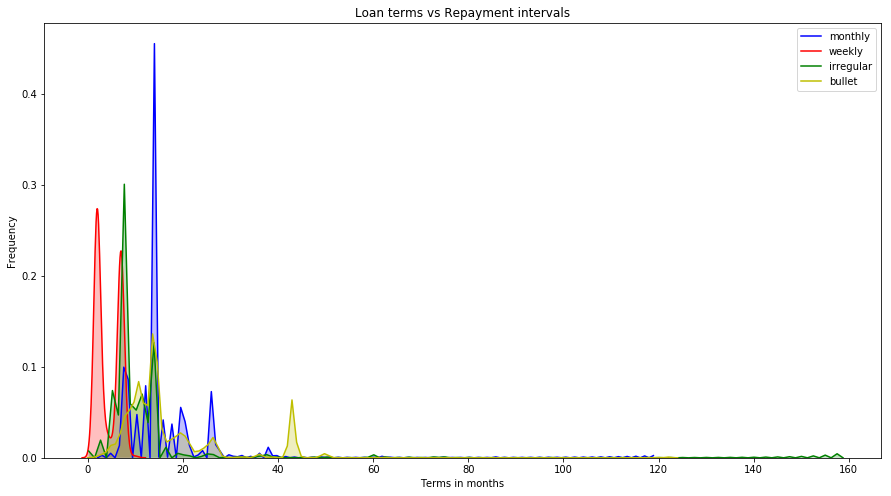

In [59]:
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(df['term_in_months'][df['repayment_interval'] == 'monthly'] , color='b',shade=True, label='monthly')
ax=sns.kdeplot(df['term_in_months'][df['repayment_interval'] == 'weekly'] , color='r',shade=True, label='weekly')
ax=sns.kdeplot(df['term_in_months'][df['repayment_interval'] == 'irregular'] , color='g',shade=True, label='irregular')
ax=sns.kdeplot(df['term_in_months'][df['repayment_interval'] == 'bullet'] , color='y',shade=True, label='bullet')
plt.title('Loan terms vs Repayment intervals')
ax.set(xlabel='Terms in months', ylabel='Frequency')

In [62]:
#what % of loans were created for kiva vs external orgs

temp = loan_themes_by_region_data['forkiva'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='For Kiva Loans or Not')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [63]:
df.posted_time = pd.to_datetime(df['posted_time'])
df.disbursed_time = pd.to_datetime(df['disbursed_time'])
df.funded_time = pd.to_datetime(df['funded_time'])

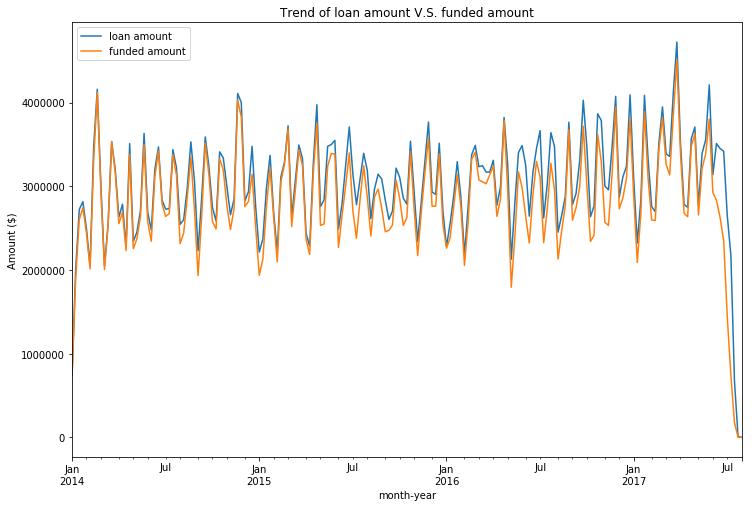

In [64]:
df.index = pd.to_datetime(df['posted_time'])
plt.figure(figsize = (12, 8))
ax = df['loan_amount'].resample('w').sum().plot()
ax = df['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(df['posted_time'].min()), 
             pd.to_datetime(df['posted_time'].max())))
ax.legend(["loan amount", "funded amount"])
plt.title('Trend of loan amount V.S. funded amount')

plt.show()

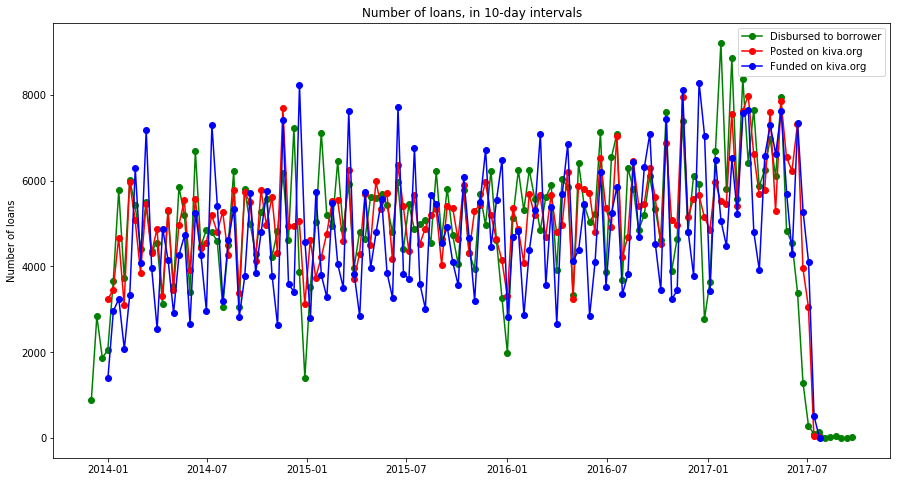

In [65]:
temp_data = df.copy()
temp_data['count']= 1  #add 1 to each row so we can count number of loans 
disbursed = temp_data.set_index(temp_data['disbursed_time'])

#disbursed.head()
disbursed = disbursed.resample('10D').sum()

posted = temp_data.set_index(temp_data['posted_time'])
posted = posted.resample('10D').sum()

funded = temp_data.set_index(temp_data['funded_time'])
funded = funded.resample('10D').sum()

plt.figure(figsize=(15,8))
plt.plot(disbursed['count'], color='green', label='Disbursed to borrower', marker='o')
plt.plot(posted['count'], color='red', label='Posted on kiva.org', marker='o')
plt.plot(funded['count'], color='blue', label='Funded on kiva.org', marker='o')
plt.legend(loc='down right')
plt.title("Number of loans, in 10-day intervals")
plt.ylabel("Number of loans")
plt.show()

In [8]:
#Status of loans - most are funded

temp = loans_data['status'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='status of loans')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [66]:
loan_use_in_kenya = df['use'][df['country'] == 'Kenya']
percentages = round(loan_use_in_kenya.value_counts() / len(loan_use_in_kenya) * 100, 2)[:13]
trace = go.Pie(labels=percentages.keys(), values=percentages.values, hoverinfo='label+percent', 
                textfont=dict(size=18, color='#000000'))
data = [trace]
layout = go.Layout(width=800, height=800, title='Top 13 loan uses in Kenya',titlefont= dict(size=20), 
                   legend=dict(x=0.1,y=-5))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, show_link=False)

In [67]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='Kenya'])
temp.head()

Partner ID Field Partner Name                       sector  \
5874         133   VisionFund Kenya  General Financial Inclusion   
5875         133   VisionFund Kenya  General Financial Inclusion   
5876         133   VisionFund Kenya  General Financial Inclusion   
5877         133   VisionFund Kenya  General Financial Inclusion   
5878         133   VisionFund Kenya  General Financial Inclusion   

        Loan Theme ID Loan Theme Type country forkiva              region  \
5874  a1050000000wf0f         General   Kenya      No               AHERO   
5875  a1050000000wf0f         General   Kenya      No       Aldina, Jomvu   
5876  a1050000000wf0f         General   Kenya      No  Aldina,Jomvu Kenya   
5877  a1050000000wf0f         General   Kenya      No        Aldina,Jomvu   
5878  a1050000000wf0f         General   Kenya      No   Bakarani, Mombasa   

     geocode_old  ISO  number  amount               LocationName  \
5874         NaN  KEN       2     600               AHERO, Kenya   
5875         NaN  KEN       5    1050       Aldina, Jomvu, Kenya   
5876         NaN  KEN       1     150  Aldina,Jomvu Kenya, Kenya   
5877         NaN  KEN       3     400        Aldina,Jomvu, Kenya   
5878         NaN  KEN       5    1100   Bakarani, Mombasa, Kenya   

                         geocode                                        names  \
5874  [(-0.1744386, 34.9203383)]                  Ahero; Kisumu County; Kenya   
5875  [(-3.9963167, 39.6142085)]  Jomvu Road; Kaloleni; Mombasa; Coast; Kenya   
5876  [(-3.9963167, 39.6142085)]  Jomvu Road; Kaloleni; Mombasa; Coast; Kenya   
5877  [(-3.9963167, 39.6142085)]  Jomvu Road; Kaloleni; Mombasa; Coast; Kenya   
5878  [(-4.0155238, 39.6935344)]             Old Malindi Road; Mombasa; Kenya   

                           geo       lat        lon      mpi_region  \
5874  (-0.1744386, 34.9203383) -0.174439  34.920338  Western, Kenya   
5875  (-3.9963167, 39.6142085) -3.996317  39.614209  Central, Kenya   
5876  (-3.9963167, 39.6142085) -3.996317  39.614209  Central, Kenya   
5877  (-3.9963167, 39.6142085) -3.996317  39.614209  Central, Kenya   
5878  (-4.0155238, 39.6935344) -4.015524  39.693534  Central, Kenya   

                       mpi_geo  rural_pct  
5874    (-0.115003, 34.851379)       65.0  
5875  (-4.0627412, 39.6771481)       65.0  
5876  (-4.0627412, 39.6771481)       65.0  
5877  (-4.0627412, 39.6771481)       65.0  
5878  (-4.0627412, 39.6771481)       65.0

In [72]:
# A table to show top 7 regions in India with higher funded amount
print("The top 7 regions in Kenya with highest funded amount(Descending Order)")
top_cities = temp.sort_values(by='amount',ascending=False)
top10_cities=top_cities.head(10)
top10_cities

The top 7 regions in Kenya with highest funded amount(Descending Order)


Partner ID       Field Partner Name                       sector  \
11210         202            One Acre Fund                  Agriculture   
11208         202            One Acre Fund                  Agriculture   
7974          156            Juhudi Kilimo  General Financial Inclusion   
11200         202            One Acre Fund                  Agriculture   
11203         202            One Acre Fund                  Agriculture   
7952          156            Juhudi Kilimo  General Financial Inclusion   
8142          164  Yehu Microfinance Trust  General Financial Inclusion   
8149          164  Yehu Microfinance Trust  General Financial Inclusion   
8005          156            Juhudi Kilimo  General Financial Inclusion   
11202         202            One Acre Fund                  Agriculture   

         Loan Theme ID                             Loan Theme Type country  \
11210  a1050000004EtAY  Subsistence Agriculture and Solar Lanterns   Kenya   
11208  a1050000004EtAY  Subsistence Agriculture and Solar Lanterns   Kenya   
7974   a1050000002VraP                                 Agriculture   Kenya   
11200  a1050000004EtAY  Subsistence Agriculture and Solar Lanterns   Kenya   
11203  a1050000004EtAY  Subsistence Agriculture and Solar Lanterns   Kenya   
7952   a1050000002VraP                                 Agriculture   Kenya   
8142   a1050000000wf14                                     General   Kenya   
8149   a1050000000wf14                                     General   Kenya   
8005   a1050000002VraP                                 Agriculture   Kenya   
11202  a1050000004EtAY  Subsistence Agriculture and Solar Lanterns   Kenya   

      forkiva     region              geocode_old  ISO  number   amount  \
11210     Yes     Webuye  (0.6166667, 34.7666667)  KEN   22538  1451900   
11208     Yes       Teso                      NaN  KEN   17334  1155200   
7974       No     Kitale        (1.0166667, 35.0)  KEN    1739   688850   
11200     Yes     Chwele                      NaN  KEN    9798   584275   
11203     Yes     Matete                      NaN  KEN    7382   498225   
7952       No    Eldoret  (0.5166667, 35.2833333)  KEN    1117   452425   
8142       No     Likoni                      NaN  KEN    1210   389625   
8149       No  Msambweni                      NaN  KEN    1124   349125   
8005       No      Nkubu                      NaN  KEN     808   322700   
11202     Yes   Kimilili                      NaN  KEN    4157   315425   

           LocationName                             geocode  \
11210     Webuye, Kenya            [(0.5992059, 34.779603)]   
11208       Teso, Kenya  [(0.6197524999999999, 34.3452623)]   
7974      Kitale, Kenya            [(1.019089, 35.0023048)]   
11200     Chwele, Kenya           [(0.7358836, 34.5777565)]   
11203     Matete, Kenya            [(0.5382528, 34.790732)]   
7952     Eldoret, Kenya  [(0.5142774999999999, 35.2697802)]   
8142      Likoni, Kenya          [(-4.0929017, 39.6614446)]   
8149   Msambweni, Kenya           [(-4.4652898, 39.481266)]   
8005       Nkubu, Kenya           [(-0.0646591, 37.667929)]   
11202   Kimilili, Kenya  [(0.7826812999999999, 34.7202041)]   

                                    names                               geo  \
11210       Webuye; Bungoma County; Kenya            (0.5992059, 34.779603)   
11208                 Kenya; Busia County  (0.6197524999999999, 34.3452623)   
7974    Kitale; Trans-Nzoia County; Kenya            (1.019089, 35.0023048)   
11200       Chwele; Bungoma County; Kenya           (0.7358836, 34.5777565)   
11203              Kenya; Kakamega County            (0.5382528, 34.790732)   
7952   Eldoret; Uasin Gishu County; Kenya  (0.5142774999999999, 35.2697802)   
8142        Likoni; Mombasa; Coast; Kenya          (-4.0929017, 39.6614446)   
8149       Msambweni; Kwale County; Kenya           (-4.4652898, 39.481266)   
8005            Nkubu; Meru County; Kenya           (-0.0646591, 37.667929)   
11202     Ki

Text(0.5,1,'Most dominant field partner names in Kenya with count')

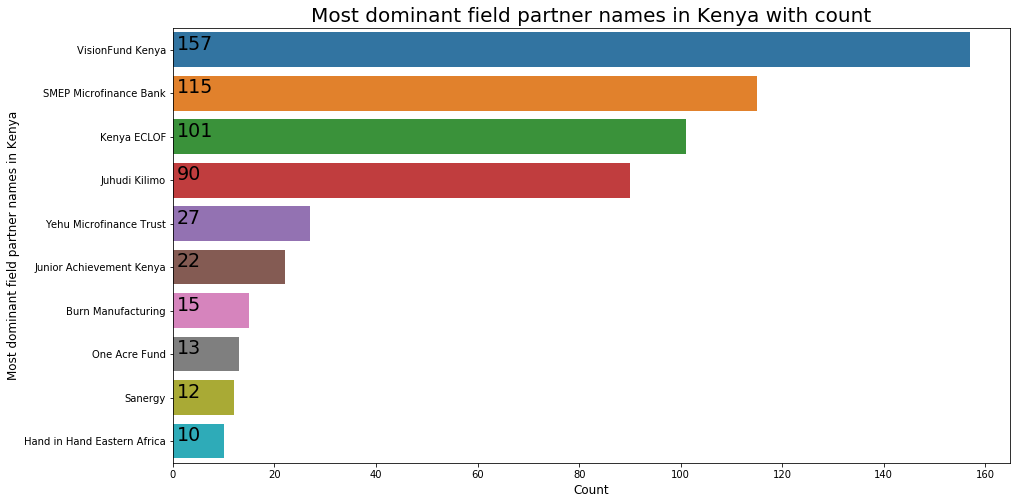

In [73]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='Kenya'])
plt.figure(figsize=(15,8))
count = temp['Field Partner Name'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Most dominant field partner names in Kenya', fontsize=12)
plt.title("Most dominant field partner names in Kenya with count", fontsize=20)

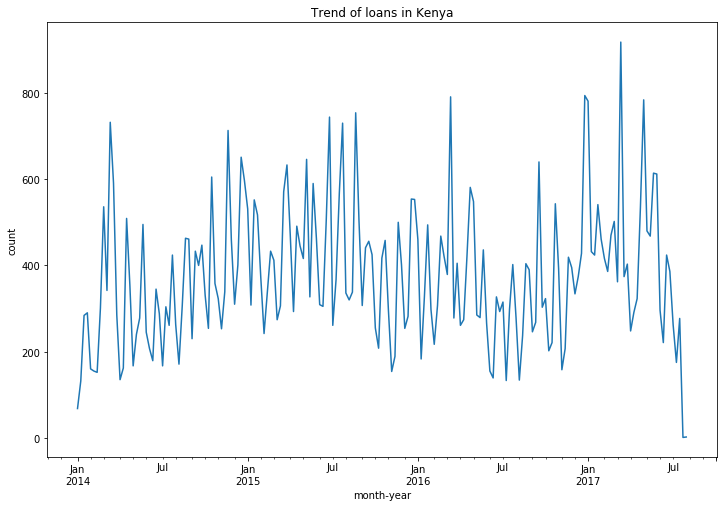

In [75]:
df.index = pd.to_datetime(df['funded_time'])
plt.figure(figsize = (12, 8))
ax = df[df["country"]=='Kenya']['funded_time'].resample('w').count().plot()
ax.set_ylabel('count')
ax.set_xlabel('month-year')
plt.title('Trend of loans in Kenya')

plt.show()

Text(0.5,1,'Most Popular Field Partners in Kenya')

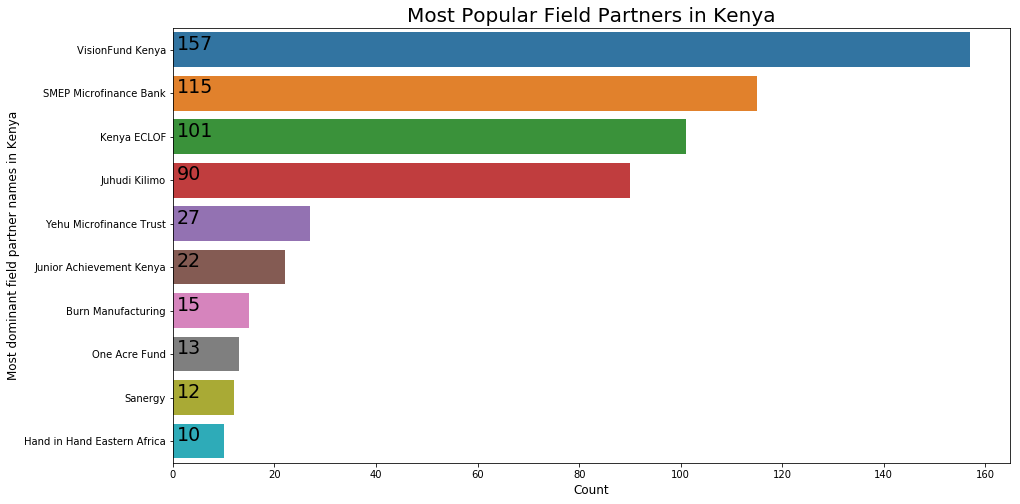

In [6]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='Kenya'])
plt.figure(figsize=(15,8))
count = temp['Field Partner Name'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Most dominant field partner names in Kenya', fontsize=12)
plt.title("Most Popular Field Partners in Kenya", fontsize=20)

In [9]:
temp = loans_data['distribution_model'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title=' Distribution models of loans')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [10]:
#Status of loans - most are funded

temp = loans_data['status'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='status of loans')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [21]:
import re
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

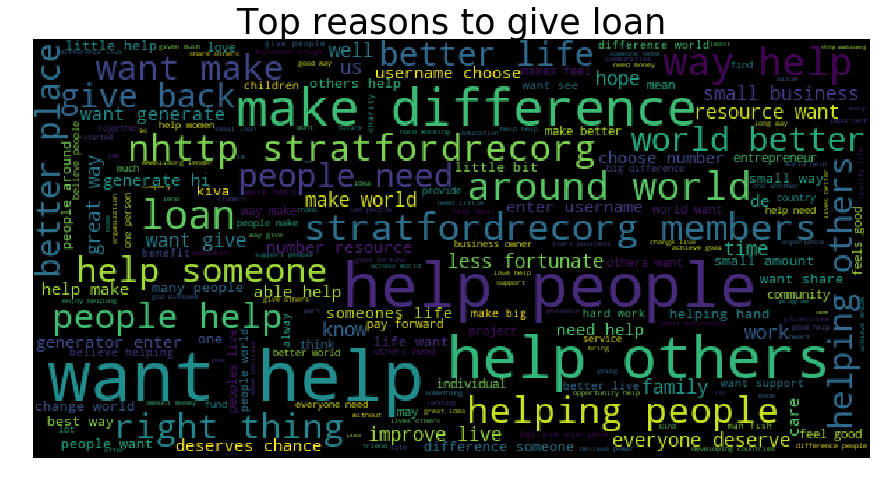

In [24]:
# remove null value from column "loan_because"
temp_data = lenders_data.dropna(subset=['loan_because'])
# convertinginto lowercase
temp_data['loan_because'] = temp_data['loan_because'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['loan_because'] = temp_data['loan_because'].map(text_prepare)


from wordcloud import WordCloud

#names = kiva_loans_data["country"][~pd.isnull(kiva_loans_data["country"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(temp_data['loan_because'].values))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Top reasons to give loan", fontsize=35)
plt.axis("off")
plt.show() 

Text(0.5,1,'population below poverty line for different countries in % ')

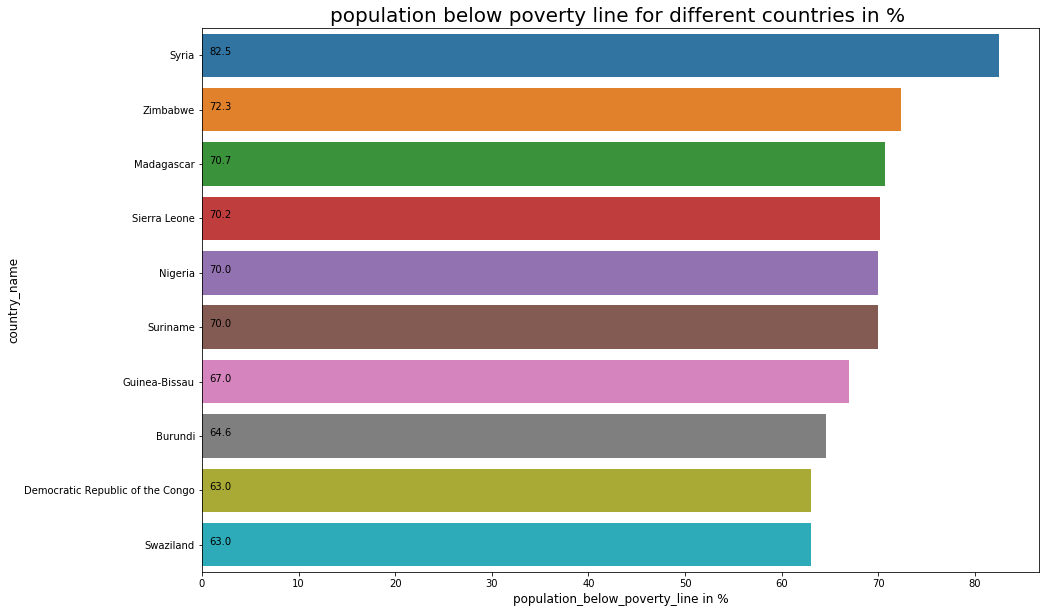

In [29]:
temp = country_stats_data.sort_values(by =['population_below_poverty_line'], ascending = False)
temp2 = temp[['country_name','population_below_poverty_line']]
temp1 = temp2.head(10)
plt.figure(figsize = (15, 10))
sns.barplot(temp1['population_below_poverty_line'], temp1['country_name'])
for i, v in enumerate(temp1['population_below_poverty_line']):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('population_below_poverty_line in %', fontsize=12)
plt.ylabel('country_name', fontsize=12)
plt.title("population below poverty line for different countries in % ", fontsize=20)

In [30]:
data = [dict(
        type='choropleth',
        locations= country_stats_data['country_name'],
        locationmode='country names',
        z=country_stats_data['population_below_poverty_line'],
        text=country_stats_data['country_name'],
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='population_below_poverty_line in %'),
)]
layout = dict(title = 'Population below poverty line for different countries in % ',)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

In [30]:
df.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00              12   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00              11   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00              43   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00              11   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00              14   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [36]:
df.dtypes

id                      int64
funded_amount           int64
loan_amount             int64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months          int64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [31]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

activity          sector  \
0  Fruits & Vegetables            Food   
1             Rickshaw  Transportation   
2       Transportation  Transportation   
3           Embroidery            Arts   
4           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency                posted_time  \
0        Lahore      PKR  2014-01-01 06:12:39+00:00   
1        Lahore      PKR  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR  2014-01-01 09:58:07+00:00   
3        Lahore      PKR  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00   

                           tags borrower_genders repayment_interval  \
0                           NaN           female          irregular   
1                           NaN   female, female          irregular   
2  user_favorite, user_favorite           female             bullet   
3                           NaN           female          irregular   
4                           NaN           female            monthly   

         date  
0  2014-01-01  
1  2014-01-01  
2  2014-01-01  
3  2014-01-01  
4  2014-01-01

In [35]:
obj_df = df.select_dtypes(include=['float']).copy()

obj_df.head()

partner_id
0       247.0
1       247.0
2       334.0
3       247.0
4       245.0

In [37]:
obj_df = df.select_dtypes(include=['int64']).copy()
obj_df.head()

id  funded_amount  loan_amount  term_in_months  lender_count
0  653051            300          300              12            12
1  653053            575          575              11            14
2  653068            150          150              43             6
3  653063            200          200              11             8
4  653084            400          400              14            16

In [4]:
to_drop = ['use',
          'country_code',
          'tags']
df.drop(to_drop, inplace=True, axis =1)

In [5]:
df.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

    country        region currency  partner_id                posted_time  \
0  Pakistan        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1  Pakistan        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     India     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3  Pakistan        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Pakistan  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00              12   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00              11   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00              43   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00              11   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00              14   

   lender_count borrower_genders repayment_interval        date  
0            12           female          irregular  2014-01-01  
1            14   female, female          irregular  2014-01-01  
2             6           female             bullet  2014-01-01  
3             8           female          irregular  2014-01-01  
4            16           female            monthly  2014-01-01

In [3]:
df['id'].is_unique

True

In [6]:
df = df.set_index('id')
df.head()

funded_amount  loan_amount             activity          sector  \
id                                                                        
653051            300          300  Fruits & Vegetables            Food   
653053            575          575             Rickshaw  Transportation   
653068            150          150       Transportation  Transportation   
653063            200          200           Embroidery            Arts   
653084            400          400           Milk Sales            Food   

         country        region currency  partner_id  \
id                                                    
653051  Pakistan        Lahore      PKR       247.0   
653053  Pakistan        Lahore      PKR       247.0   
653068     India     Maynaguri      INR       334.0   
653063  Pakistan        Lahore      PKR       247.0   
653084  Pakistan  Abdul Hakeem      PKR       245.0   

                      posted_time             disbursed_time  \
id                                                             
653051  2014-01-01 06:12:39+00:00  2013-12-17 08:00:00+00:00   
653053  2014-01-01 06:51:08+00:00  2013-12-17 08:00:00+00:00   
653068  2014-01-01 09:58:07+00:00  2013-12-17 08:00:00+00:00   
653063  2014-01-01 08:03:11+00:00  2013-12-24 08:00:00+00:00   
653084  2014-01-01 11:53:19+00:00  2013-12-17 08:00:00+00:00   

                      funded_time  term_in_months  lender_count  \
id                                                                
653051  2014-01-02 10:06:32+00:00              12            12   
653053  2014-01-02 09:17:23+00:00              11            14   
653068  2014-01-01 16:01:36+00:00              43             6   
653063  2014-01-01 13:00:00+00:00              11             8   
653084  2014-01-01 19:18:51+00:00              14            16   

       borrower_genders repayment_interval        date  
id                                                      
653051           female          irregular  2014-01-01  
653053   female, female          irregular  2014-01-01  
653068           female             bullet  2014-01-01  
653063           female          irregular  2014-01-01  
653084           female            monthly  2014-01-01

In [7]:
df.get_dtype_counts()

int64       4
object     11
float64     1
dtype: int64

In [15]:
#dropping times from dates

extr = df['posted_time'].str.extract(r'^(\d{4})', expand=False)
extr.head()

id
653051    2014
653053    2014
653068    2014
653063    2014
653084    2014
Name: posted_time, dtype: object

In [16]:
df['posted_time'] = pd.to_numeric(extr)
df['posted_time'].dtype

dtype('int64')

In [17]:
extr1 = df['disbursed_time'].str.extract(r'^(\d{4})', expand=False)
extr1.head()

id
653051    2013
653053    2013
653068    2013
653063    2013
653084    2013
Name: disbursed_time, dtype: object

In [18]:
extr2= extr1 = df['funded_time'].str.extract(r'^(\d{4})', expand=False)
extr1.head()

id
653051    2014
653053    2014
653068    2014
653063    2014
653084    2014
Name: funded_time, dtype: object

In [ ]:
extr1 = df['posted_time'].str.extract(r'^(\d{4})', expand=False)
extr1.head()

In [6]:
#explore loans data - commencing a seperate eda
loans_data.head()

loan_id       loan_name original_language  \
0   657307            Aivy           English   
1   657259  Idalia Marizza           Spanish   
2   658010           Aasia           English   
3   659347         Gulmira           Russian   
4   656933         Ricky\t           English   

                                         description  \
0  Aivy, 21 years of age, is single and lives in ...   
1  Doña Idalia, esta casada, tiene 57 años de eda...   
2  Aasia is a 45-year-old married lady and she ha...   
3  Гулмире 36 лет, замужем, вместе с супругом вос...   
4  Ricky is a farmer who currently cultivates his...   

                              description_translated  funded_amount  \
0                                                NaN          125.0   
1  Idalia, 57, is married and lives with her husb...          400.0   
2                                                NaN          400.0   
3  Gulmira is 36 years old and married.  She and ...          625.0   
4                                                NaN          425.0   

   loan_amount  status  activity_name  sector_name  \
0        125.0  funded  General Store       Retail   
1        400.0  funded  Used Clothing     Clothing   
2        400.0  funded  General Store       Retail   
3        625.0  funded        Farming  Agriculture   
4        425.0  funded        Farming  Agriculture   

                                            loan_use country_code  \
0   to buy additional inventories for her sari-sa...           PH   
1  To buy American clothing such as blouses, shir...           HN   
2              to buy stock of rice, sugar and flour           PK   
3  to buy cucumber and tomato seeds, as well as f...           KG   
4   to buy organic fertilizer and agrochemical pr...           PH   

  country_name                       town_name currency_policy  \
0  Philippines            Ozamiz - Ozamiz City          shared   
1     Honduras               La Lopez, Choloma          shared   
2     Pakistan                       Lala Musa          shared   
3   Kyrgyzstan      Aravan village, Osh region          shared   
4  Philippines  Baleleng, Sto. Thomas, Isabela          shared   

   currency_exchange_coverage_rate currency  partner_id  \
0                              0.1      PHP       126.0   
1                              0.1      HNL       201.0   
2                              0.1      PKR       245.0   
3                              0.1      KGS       171.0   
4                              0.1      PHP       123.0   

                     posted_time        planned_expiration_time  \
0  2014-01-15 02:23:45.000 +0000  2014-02-14 03:30:06.000 +0000   
1  2014-01-14 20:23:20.000 +0000  2014-03-26 22:25:07.000 +0000   
2  2014-01-16 11:32:58.000 +0000  2014-02-15 21:10:05.000 +0000   
3  2014-01-20 09:59:48.000 +0000  2014-02-21 03:10:02.000 +0000   
4  2014-01-14 05:46:21.000 +0000  2014-02-13 06:10:02.000 +0000   

                   disburse_time                    raised_time  lender_term  \
0  2013-12-22 08:00:00.000 +0000  2014-01-15 04:48:22.000 +0000          7.0   
1  2013-12-20 08:00:00.000 +0000  2014-02-25 06:42:06.000 +0000          8.0   
2  2014-01-09 08:00:00.000 +0000  2014-01-24 23:06:18.000 +0000         14.0   
3  2014-01-17 08:00:00.000 +0000  2014-01-22 05:29:28.000 +0000         14.0   
4  2013-12-17 08:00:00.000 +0000  2014-01-14 17:29:27.000 +0000          7.0   

   num_lenders_total  num_journal_entries  num_bulk_entries  \
0                  3                    2                 1   
1                 11                    2                 1   
2                 16                    2                 1   
3                 21                    2                 1   
4                 15                    2                 1   

                                                tags borrower_genders  \
0                                                NaN           female   
1                                                

In [10]:
#missing data 

total = loans_data.isnull().sum().sort_values(ascending = False)
percent = (loans_data.isnull().sum()/loans_data.isnull().count()).sort_values(ascending = False)
missing_loans_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loans_data

Total   Percent
tags                             784054  0.552304
description_translated           452678  0.318876
planned_expiration_time          371834  0.261927
currency_exchange_coverage_rate  321526  0.226489
town_name                        161758  0.113946
raised_time                       64282  0.045282
loan_name                         47558  0.033501
description                       43285  0.030491
loan_use                          43273  0.030482
original_language                 43251  0.030467
borrower_genders                  43251  0.030467
borrower_pictured                 43251  0.030467
partner_id                        16790  0.011827
disburse_time                      2813  0.001982
lender_term                          24  0.000017
country_code                          9  0.000006
sector_name                           0  0.000000
funded_amount                         0  0.000000
loan_amount                           0  0.000000
status                                0  0.000000
activity_name                         0  0.000000
distribution_model                    0  0.000000
country_name                          0  0.000000
currency_policy                       0  0.000000
repayment_interval                    0  0.000000
currency                              0  0.000000
posted_time                           0  0.000000
num_lenders_total                     0  0.000000
num_journal_entries                   0  0.000000
num_bulk_entries                      0  0.000000
loan_id                               0  0.000000

Text(0.5,1,'Most frequent countries for Kiva Loans')

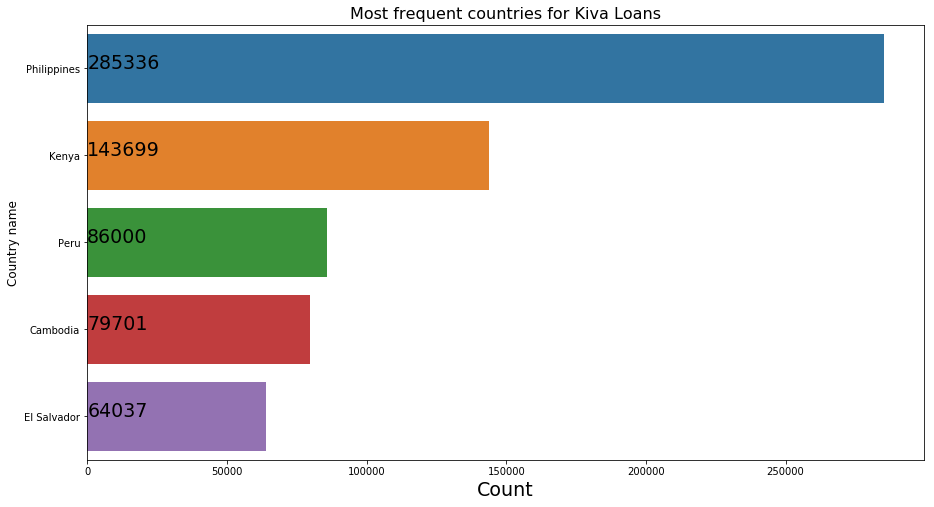

In [11]:
#loan count

plt.figure(figsize=(15,8))
count = loans_data['country_name'].value_counts().head()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v, color='k', fontsize=19)
plt.xlabel('Count', fontsize=19)
plt.ylabel('Country name', fontsize=12)
plt.title("Most frequent countries for Kiva Loans", fontsize=16)

Text(0.5,1,'Most frequent Sectors for Kiva Loans')

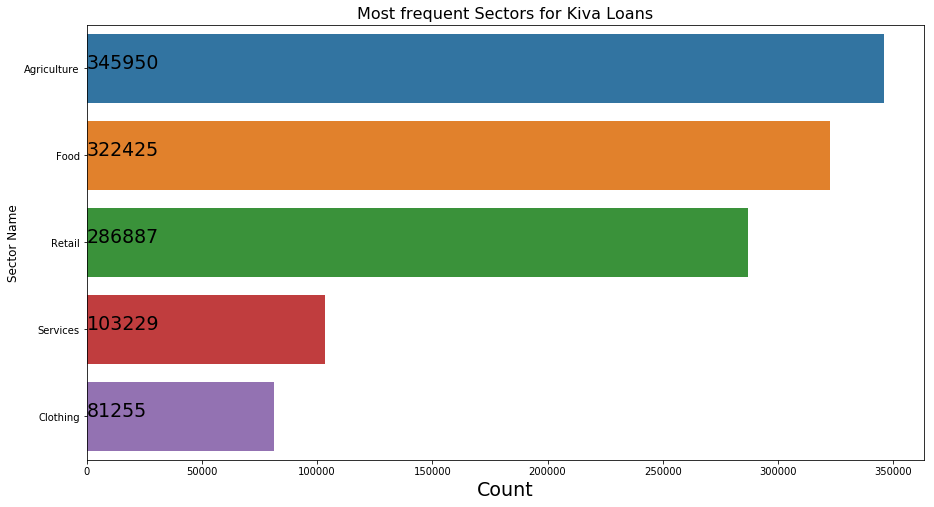

In [12]:
plt.figure(figsize=(15,8))
count = loans_data['sector_name'].value_counts().head()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v, color='k', fontsize=19)
plt.xlabel('Count', fontsize=19)
plt.ylabel('Sector Name', fontsize=12)
plt.title("Most frequent Sectors for Kiva Loans", fontsize=16)

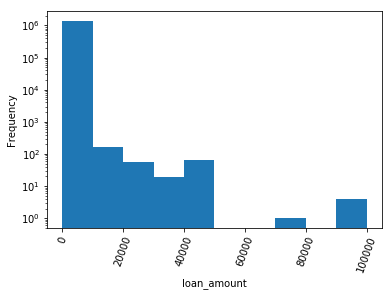

In [15]:
loans_data['loan_amount'].plot(kind = 'hist', rot=70, logx=False, logy=True)
plt.xlabel('loan_amount')
plt.show()

In [16]:
#Gender distribution 

gender_list = []
for gender in loans_data["borrower_genders"].values:
    if str(gender) != "nan":
        gender_list.extend( [lst.strip() for lst in gender.split(",")] )
temp_data = pd.Series(gender_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Borrower Gender')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

<Figure size 1080x576 with 0 Axes>

loan_id  funded_amount  loan_amount  \
loan_id                          1.000000      -0.010612     0.012491   
funded_amount                   -0.010612       1.000000     0.960592   
loan_amount                      0.012491       0.960592     1.000000   
currency_exchange_coverage_rate -0.674888      -0.008082    -0.020547   
partner_id                       0.452031      -0.066195    -0.057106   
lender_term                      0.076137       0.159129     0.188700   
num_lenders_total               -0.079016       0.875975     0.836980   
num_journal_entries             -0.224209       0.053751     0.035009   
num_bulk_entries                -0.132481       0.045534     0.034500   

                                 currency_exchange_coverage_rate  partner_id  \
loan_id                                                -0.674888    0.452031   
funded_amount                                          -0.008082   -0.066195   
loan_amount                                            -0.020547   -0.057106   
currency_exchange_coverage_rate                         1.000000   -0.256584   
partner_id                                             -0.256584    1.000000   
lender_term                                            -0.100725    0.115435   
num_lenders_total                                       0.040180   -0.038321   
num_journal_entries                                     0.078716   -0.051707   
num_bulk_entries                                        0.024960   -0.023171   

                                 lender_term  num_lenders_total  \
loan_id                             0.076137          -0.079016   
funded_amount                       0.159129           0.875975   
loan_amount                         0.188700           0.836980   
currency_exchange_coverage_rate    -0.100725           0.040180   
partner_id                          0.115435          -0.038321   
lender_term                         1.000000           0.211348   
num_lenders_total                   0.211348           1.000000   
num_journal_entries                 0.063248           0.079652   
num_bulk_entries                    0.145360           0.066337   

                                 num_journal_entries  num_bulk_entries  
loan_id                                    -0.224209         -0.132481  
funded_amount                               0.053751          0.045534  
loan_amount                                 0.035009          0.034500  
currency_exchange_coverage_rate             0.078716          0.024960  
partner_id                                 -0.051707         -0.023171  
lender_term                                 0.063248          0.145360  
num_lenders_total                           0.079652          0.066337  
num_journal_entries                         1.000000          0.871624  
num_bulk_entries                            0.871624          1.000000

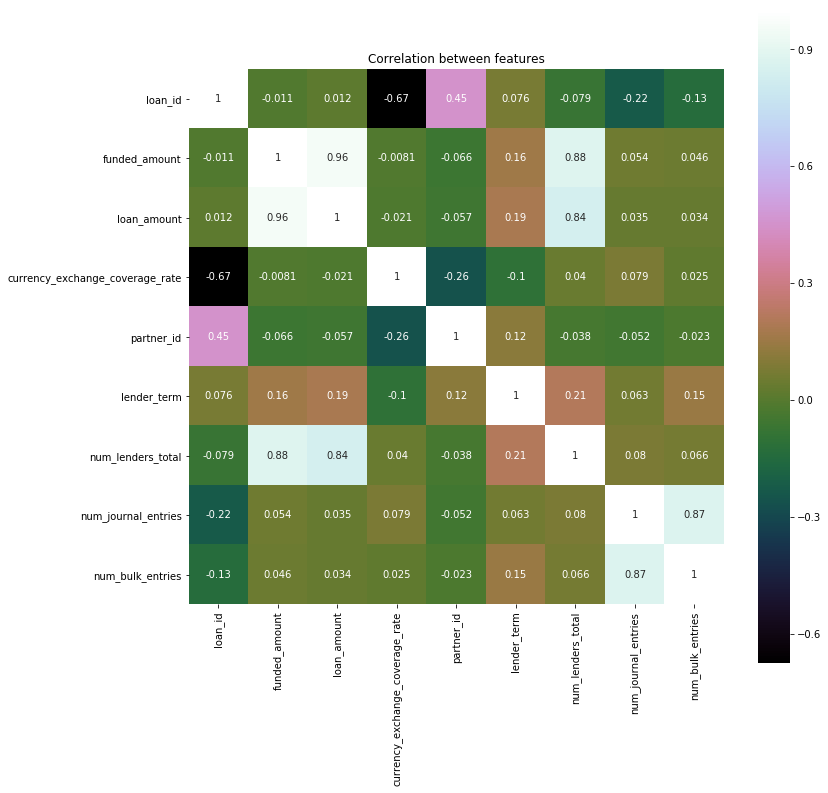

In [17]:
#Correlation Matrix - values more then 0.05 should be investigated
corr = loans_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between features')
corr

population  population_below_poverty_line  \
population                       1.000000                      -0.131018   
population_below_poverty_line   -0.131018                       1.000000   
hdi                             -0.003770                      -0.701636   
life_expectancy                  0.017042                      -0.669898   
expected_years_of_schooling     -0.009603                      -0.609172   
mean_years_of_schooling         -0.040256                      -0.620420   
gni                             -0.047078                      -0.527103   

                                    hdi  life_expectancy  \
population                    -0.003770         0.017042   
population_below_poverty_line -0.701636        -0.669898   
hdi                            1.000000         0.903920   
life_expectancy                0.903920         1.000000   
expected_years_of_schooling    0.924112         0.807743   
mean_years_of_schooling        0.913757         0.755681   
gni                            0.741323         0.636951   

                               expected_years_of_schooling  \
population                                       -0.009603   
population_below_poverty_line                    -0.609172   
hdi                                               0.924112   
life_expectancy                                   0.807743   
expected_years_of_schooling                       1.000000   
mean_years_of_schooling                           0.844049   
gni                                               0.619757   

                               mean_years_of_schooling       gni  
population                                   -0.040256 -0.047078  
population_below_poverty_line                -0.620420 -0.527103  
hdi                                           0.913757  0.741323  
life_expectancy                               0.755681  0.636951  
expected_years_of_schooling                   0.844049  0.619757  
mean_years_of_schooling                       1.000000  0.603777  
gni                                           0.603777  1.000000

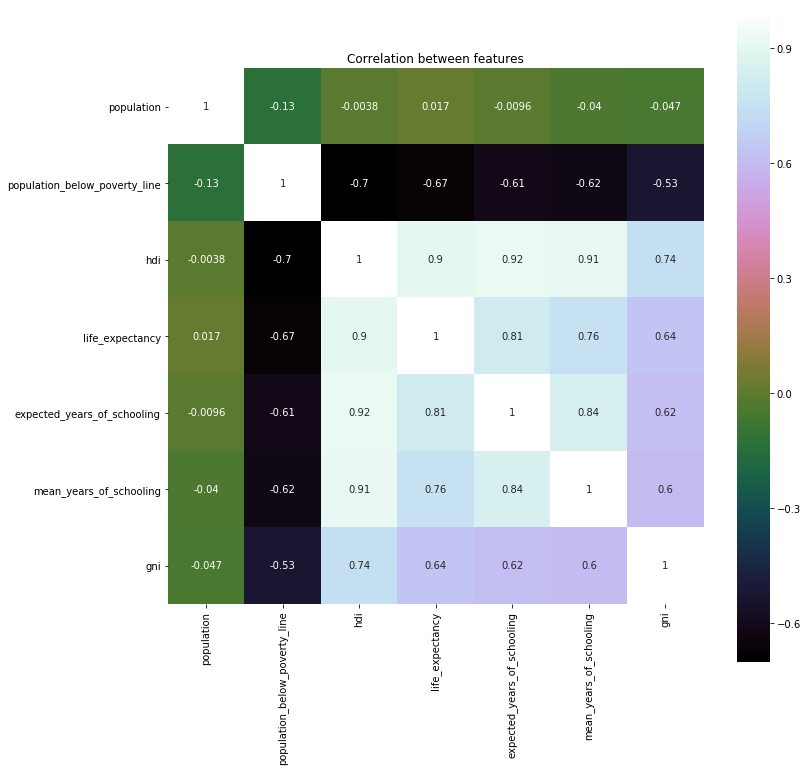

In [20]:
#country stats correlation matrix
#Correlation Matrix - values more then 0.05 should be investigated
corr = country_stats.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between features')
corr

In [22]:
country_stats.describe()

population  population_below_poverty_line         hdi  \
count  1.740000e+02                     152.000000  171.000000   
mean   4.321924e+07                      28.476974    0.695777   
std    1.515067e+08                      17.544183    0.159795   
min    1.964400e+05                       0.200000    0.352440   
25%    4.063056e+06                      15.100000    0.555122   
50%    1.012010e+07                      23.000000    0.727287   
75%    3.183905e+07                      38.725000    0.827402   
max    1.409517e+09                      82.500000    0.949423   

       life_expectancy  expected_years_of_schooling  mean_years_of_schooling  \
count       168.000000                   168.000000               168.000000   
mean         71.059048                    12.938925                 8.282872   
std           8.640918                     3.034415                 3.195489   
min          48.943000                     4.871620                 1.441532   
25%          64.712250                    10.750630                 5.619660   
50%          73.302500                    13.089405                 8.567027   
75%          77.177000                    15.176165                11.234470   
max          84.163000                    20.432720                13.370000   

                 gni  
count     168.000000  
mean    17494.527727  
std     19271.207947  
min       587.473961  
25%      3433.157219  
50%     10492.681260  
75%     24666.624997  
max    129915.600900

In [23]:
data = [dict(
        type='choropleth',
        locations=country_stats['country_name'],
        locationmode='country names',
        z=country_stats['hdi'],
        text=country_stats['country_name'],
        colorscale='Portland',
        reversescale=True,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar=dict(autotick=False, tickprefix='', title='HDI'),
)]
layout = dict(
    title = 'Human Development Index',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hdi-world-map')

In [26]:
data = [dict(
        type='choropleth',
        locations=country_stats['country_name'],
        locationmode='country names',
        z=np.log10(country_stats['mean_years_of_schooling'] + 1),
        text=country_stats['country_name'],
        colorscale='Greens',
        reversescale=True,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar=dict(autotick=False, tickprefix='', title='Lenders'),
)]
layout = dict(
    title = 'Number of lenders by Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='Mean Years of Schoolin')